In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import itertools
plt.rcParams['axes.facecolor'] = 'white'
from scipy.stats import f
import math

In [2]:
def createPlot(df,ref_df,x,y,z="default",axIndex=0,palette="Set2",**kwargs):
    """Create a scatter plot with multiple subplots indexed vertically
    
    Args:
    -----
        df: dataframe with plotting data
        ref_df: reference dataframe for plotting base categories
        x: string name of column considered x data
        y: string name of column considered y data
        z: string name of column with categorical data
        axIndex: a number for indexing subplots vertically
        palette: string for seaborn palette
        
    Returns:
    --------
        only functions when figure object is initialized, plots subplots vertically
    """
    
    #if no category variable is given, plot as one category
    if z == "default":
        ax[axIndex].scatter(x=df[x],y=df[y],c=palette, edgecolors='grey',linewidths=0.75,**kwargs)
    else:
        #get unique labels from categorical tab
        classes = ref_df[z].unique()

        #load in seaborn colour palette
        rgb_values = sns.color_palette(palette,len(classes))

        #map categories to colours
        color_map = dict(zip(classes, rgb_values))

        #looping and entering each category as distinct entries so that a legend is auto generated    
        for i,cla in enumerate(classes):

            xdata = [d[x] for i,d in df.iterrows() if cla == d[z]]
            ydata = [d[y] for i,d in df.iterrows() if cla == d[z]]
            category = pd.Series([d[z] for i,d in df.iterrows() if cla == d[z]])

            ax[axIndex].scatter(
                x=xdata,y=ydata,c=category.map(color_map),
                label=cla,edgecolors='grey',linewidths=0.75,**kwargs)

In [3]:
def createOnePlot(df,ref_df,x,y,z="default",palette="Set2"):
    """Create a single scatter plot
    
    Args:
    -----
        df: dataframe with plotting data
        ref_df: reference dataframe for plotting base categories
        x: string name of column considered x data
        y: string name of column considered y data
        z: string name of column with categorical data
        palette: string for seaborn palette
        
    Returns:
    --------
        only functions when figure object is initialized, plots a single plot
    """
    #if no category variable is given, plot as one category
    if z == "default":
        ax.scatter(x=df[x],y=df[y],c=palette, marker='o',s=20,edgecolors='grey',linewidths=0.75,alpha=0.8)
    else:
        #get unique labels from categorical tab
        classes = ref_df[z].unique()

        #load in seaborn colour palette
        rgb_values = sns.color_palette(palette,len(classes))

        #map categories to colours
        color_map = dict(zip(classes, rgb_values))

        #looping and entering each category as distinct entries so that a legend is auto generated
        for i,cla in enumerate(classes):

            xdata = [d[x] for i,d in df.iterrows() if cla == d[z]]
            ydata = [d[y] for i,d in df.iterrows() if cla == d[z]]
            category = pd.Series([d[z] for i,d in df.iterrows() if cla == d[z]])

            ax.scatter(
                x=xdata,y=ydata,c=category.map(color_map),
                label=cla,marker='o',s=20,edgecolors='grey',linewidths=0.75,alpha=0.8)

In [4]:
def manualInput(df,z,categoryName,color,marker,axIndex,x='PC1',y='PC2'):
    """Plot a single category specifying visuals
    
    Args:
    -----
        df: dataframe with plotting data
        z: string name of column with categorical data
        categoryName: specific category to be plotted
        color: color of the marker
        marker: shape of the marker
        axIndex: a number for indexing subplots vertically
        x: a string of x column name from df
        y: y string of y column name from df
         
    Returns:
    --------
        only functions when figure object is initialized, plots a single category
    """
    xdata = [d[x] for i,d in df.iterrows() if categoryName == d[z]]
    ydata = [d[y] for i,d in df.iterrows() if categoryName == d[z]]
    ax[axIndex].scatter(
            x=xdata,y=ydata,c=color,
            label=categoryName,marker=marker,s=20,edgecolors='black',linewidths=0.75)

In [5]:
from matplotlib.patches import Ellipse

def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Adapted from Joe Kingston
    https://github.com/joferkington/oost_paper_code/blob/master/error_ellipse.py
    ---------
    
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).
    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.
    Returns
    -------
        A matplotlib ellipse artist
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Adapted from Joe Kingston
    https://github.com/joferkington/oost_paper_code/blob/master/error_ellipse.py
    ---------
    
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.
    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.
    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()
    
    #vals and vecs are eigenvalues and eigenvectors of the covariance matrix
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    #eigenvalues ends up being variance with unit eigenvectors and square root is the std
    #also values is a np.array of two length vector sorted 
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    ellip.set_facecolor('none')

    ax.add_artist(ellip)
    return ellip

In [6]:
def plot_ellipses(df,keys,target,axIndex):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Plots seperate ellipses for seperate categories in data.
    
    Parameters
    ----------
        df : a dataframe of pca transformed values
        keys : categories which are to be plotted
        target : a column within df which is matched with keys
        axIndex : The axis that the ellipse will be plotted on
        
    Returns
    -------
        Multiple ellipses drawn with specified number of categories in data
    """

    for category in keys:
        local_df = df[df[target]==category]
        # Plot 2 standard deviation covariance ellipse
        plot_point_cov(local_df.iloc[:,:2], nstd=2, ax=ax[axIndex],alpha=1, linestyle="--", linewidth=0.75,edgecolor="black")

In [7]:
def standard_pca(df,variables_list,target,inversion_x=1, inversion_y=1,
                 stats=False,projection=False,projection_limit = None,
                 scale = True, projected_stats=False):
    '''
    Performs PCA while offering quality of life enhancements
    
    Args
    ----
        df: pandas dataframe of data
        variables_list: list of features to be considered in PCA
        target: index names of samples / sample code
        inversion_x: whether or not to invert the x values
        inversion_y: whether or not to invert the y values
        stats: bool to return fitted model
        projection: True if there are data in the original dataframe which is not to be fitted and instead projected upon the model
        projection_limit: specifies the row index on which fit data ends and projection data begins 
        
    Returns
    -------
        PCA fitted model for stats 
        OR
        DataFrame of PCA scores with labeled rows and labeled columns
    '''
    assert abs(inversion_x) == 1, 'Inversion value must be 1 or -1'
    assert abs(inversion_y) == 1, 'Inversion value must be 1 or -1'
    
    #creating new columns
    columns = []
    for x,i in enumerate(variables_list):
        columns.append('PC'+str(x+1))
        
    #takes in a dataframe, and list of variables, standardizes, and then returns PCA scores in a dataframe
    X = df[variables_list]
    y = df[target]
    
    if scale:
        scaler = StandardScaler()
        scaled_X = scaler.fit_transform(X)
    else:
        scaled_X = X
        
    pca = decomposition.PCA()
    
    if stats:
        return pca.fit(scaled_X)
    
    if projection:
        if scale:
            scaled_model = scaler.fit(X.iloc[:projection_limit,:])
            scaled_X = scaled_model.transform(X)
        
        scaled_X = pd.DataFrame(scaled_X)
        model = pca.fit(scaled_X.iloc[:projection_limit,:])
        
        if projected_stats:
            return model
        
        transformed_model = pd.DataFrame(model.transform(scaled_X.iloc[:projection_limit,:]),columns=columns)
        transformed_projection = pd.DataFrame(model.transform(scaled_X.iloc[projection_limit:,:]),columns=columns)
        result_df = pd.concat([transformed_model,transformed_projection],ignore_index=True)
        
        result_df['PC1'] = result_df['PC1'] * inversion_x
        result_df['PC2'] = result_df['PC2'] * inversion_y
        print('projected!')
        return result_df.merge(y,right_index=True, left_index=True)
    else:  
        result_df = pd.DataFrame(pca.fit_transform(scaled_X),columns=columns)
        result_df['PC1'] = result_df['PC1'] * inversion_x
        result_df['PC2'] = result_df['PC2'] * inversion_y

        #print("This is the explained variance:", pca.fit(scaled_X).explained_variance_ratio_)
        return result_df.merge(y,right_index=True, left_index=True)

In [8]:
def manualInputArrow(df,z,categoryName,color,ax1,ax2,disx,disy,x='LPC1',y='LPC2'):
    '''
    Draws arrows on figure object with subplots
    
    Args
    ----
        df: pandas dataframe of data
        z: variable column
        categoryName: variable key for specific variable to be plotted
        color: accepts simple colours only
        ax1: indexing subplot vertically
        ax2: indexing subplot horizontally
        disx: x displacement for annotation
        disy: y displacement for annocation
    
    Dependencies
    ------------
    Must have imported patches from matplotlib
    
    Returns
    -------
        only functions with figure object initialized, plots one arrow
    '''
    #matching data with required condition with origin plotted at 0,0
    xdata = [0]+[d[x] for i,d in df.iterrows() if categoryName == d[z]]
    ydata = [0]+[d[y] for i,d in df.iterrows() if categoryName == d[z]]

    #arrow customization
    style = "Simple, tail_width=0.5, head_width=4, head_length=8"
    kw = dict(arrowstyle=style, color=color)

    #plotting arrow
    a1 = patches.FancyArrowPatch((xdata[0],ydata[0]), (xdata[1],ydata[1]), **kw)
    ax[ax1][ax2].add_patch(a1)

    #annotating arrow
    ax[ax1][ax2].annotate(  
                    categoryName,
                    xy=(xdata[-1], ydata[-1]), xycoords='data',
                    xytext=(disx, disy), textcoords='offset points',
                    arrowprops=dict(arrowstyle="-"),color=color)

In [9]:
def manualInputArrowOne(df,z,categoryName,color,disx=1,disy=1,scaling=1,linewidth=1,x= 'LPC1',y= 'LPC2'):
    '''
    Draws arrows on figure object
    
    Args
    ----
        df: pandas dataframe of data
        z: variable column
        categoryName: variable key for specific variable to be plotted
        color: accepts simple colours only
        disx: x displacement for annotation
        disy: y displacement for annocation
        scaling: scalar to uniformly scale arrows in x and y
        linewidth: linewidth of arrows
    
    Dependencies
    ------------
    Must have imported patches from matplotlib
    
    Returns
    -------
        only functions with figure object initialized, plots one arrow
    '''
    #matching data with required condition with origin plotted at 0,0
    xdata = [0]+[d[x] for i,d in df.iterrows() if categoryName == d[z]]
    ydata = [0]+[d[y] for i,d in df.iterrows() if categoryName == d[z]]

    #scaling the arrows
    xdata = np.array(xdata)*scaling
    ydata = np.array(ydata)*scaling

    #arrow customization
    style = "Simple, tail_width=0.5, head_width=2, head_length=4"
    kw = dict(arrowstyle=style, color=color, linewidth=linewidth)

    #plotting arrow
    a1 = patches.FancyArrowPatch((xdata[0],ydata[0]), (xdata[1],ydata[1]), **kw)
    ax.add_patch(a1)

    #generating annotations
    ax.annotate(  
                    categoryName,
                    xy=(xdata[-1], ydata[-1]), xycoords='data',
                    xytext=(disx, disy), textcoords='offset points',
                    arrowprops=dict(arrowstyle="-"),color=color)

In [10]:
def manualInputArrowWorkshop(df,z,categoryName,color,disx=1,disy=1,scaling=1,linewidth=1,x= 'LPC1',y= 'LPC2'):
    '''
    Draws arrows on figure object
    
    Args
    ----
        df: pandas dataframe of data
        z: variable column
        categoryName: variable key for specific variable to be plotted
        color: accepts simple colours only
        disx: x displacement for annotation
        disy: y displacement for annocation
        scaling: scalar to uniformly scale arrows in x and y
        linewidth: linewidth of arrows
    
    Dependencies
    ------------
    Must have imported patches from matplotlib
    
    Returns
    -------
        only functions with figure object initialized, plots one arrow
    '''
    #matching data with required condition with origin plotted at 0,0
    xdata = [0]+[d[x] for i,d in df.iterrows() if categoryName == d[z]]
    ydata = [0]+[d[y] for i,d in df.iterrows() if categoryName == d[z]]

    #scaling the arrows
    xdata = np.array(xdata)*scaling
    ydata = np.array(ydata)*scaling

    #arrow customization
    style = "Simple, tail_width=0.5, head_width=2, head_length=4"
    kw = dict(arrowstyle=style, color=color, linewidth=linewidth)

    #plotting arrow
    a1 = patches.FancyArrowPatch((xdata[0],ydata[0]), (xdata[1],ydata[1]), **kw)
    ax.add_patch(a1)

In [11]:
def manualInputArrow3D(df,z,categoryName,color,ax1,ax2,disx,disy):
    #plots 3D arrows
    x= 'LPC1'
    y= 'LPC2'
    displace_x = disx
    displace_y = disy
    xdata = [d[x] for i,d in df.iterrows() if categoryName == d[z]]
    ydata = [d[y] for i,d in df.iterrows() if categoryName == d[z]]

    ax[ax1][ax2].arrow(0,0,
            xdata[-1],ydata[-1],head_width=0.05/2,head_length=0.1/3,color=color,
            label=categoryName)
    #ax[ax1][ax2].text(xdata[-1]+disx,ydata[-1]+disy,s=categoryName,color=color)
    
    ax[ax1][ax2].annotate(
                    categoryName,
                    xy=(xdata[-1], ydata[-1]), xycoords='data',
                    xytext=(disx, disy), textcoords='offset points',
                    arrowprops=dict(arrowstyle="-"),color=color)
    

In [12]:
def manualInputArrowOriginal(df,z,categoryName,color,ax1,ax2,disx,disy):
    #deprecated, remains avaliable for reference purposes
    x= 'LPC1'
    y= 'LPC2'

    xdata = [0]+[d[x] for i,d in df.iterrows() if categoryName == d[z]]
    ydata = [0]+[d[y] for i,d in df.iterrows() if categoryName == d[z]]


    line = ax[ax1][ax2].plot(
            xdata,ydata,color=color,
            label=categoryName)
    add_arrow(line[0],color=color)

    ax[ax1][ax2].annotate(  
                    categoryName,
                    xy=(xdata[-1], ydata[-1]), xycoords='data',
                    xytext=(disx, disy), textcoords='offset points',
                    arrowprops=dict(arrowstyle="-"),color=color)
    print(xdata)
    return line,xdata,ydata

In [13]:
#quantifying seperation in PCA space with hotelling's T
def hotellings_T_squared(X, Y, maha = False):
    '''Computes hotelling's T square statistic between two categories
    
    Args:
        X: matrix relating to the first category where rows are samples and columns are features/variables
        Y: matrix relating to the second category where rows are samples and columns are features/variables
        maha: boolean, returns raw mahalanobis distance
        
    Returns:
        floats, hotelling's T squared statistic and p value
    '''
    #obtaining n and p values, second p value isn't used bc same as first
    nx, p = X.shape
    ny, _ = Y.shape
    
    #difference in means between X and Y
    mean_delta = np.mean(X, axis=0) - np.mean(Y, axis=0)
    
    #covariance matrices of X and Y
    Sx = np.cov(X, rowvar=False)
    Sy = np.cov(Y, rowvar=False)
    
    #pooled covariance matrix
    S_pooled = ((nx-1)*Sx + (ny-1)*Sy)/(nx+ny-2)
    
    #calculating hotelling's T squared on inverted pooled covariance matrix
    maha_squared = (mean_delta.transpose()@np.linalg.inv(S_pooled)@mean_delta)
    t_squared = (nx*ny)/(nx+ny) * maha_squared
    statistic = t_squared * (nx+ny-p-1)/(p*(nx+ny-2))
    
    #critical value using deg of freedom
    F = f(p, nx+ny-p-1)
    p_value = 1 - F.cdf(statistic)
    
    if maha:
        print(f"Mahalanobis distance: {np.sqrt(mean_delta.transpose()@np.linalg.inv(S_pooled)@mean_delta)}")
    print(f"Test statistic: {statistic}\nDegrees of freedom: {p} and {nx+ny-p-1}\np-value: {p_value}")
    return statistic, p_value

In [14]:
####PCA CODEBLOCK####
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

df_pca = pd.read_csv("data\\plants_aa.csv")

var_list = ['Ala', 'Asx', 'Glx', 'Gly', 'Leu', 'Phe', 'Pro', 'Ser', 'Thr', 'Val']
all_var_pca = standard_pca(df_pca,var_list,'Assignment')

df_scr_plnt = all_var_pca.rename(columns={'Assignment':'Species'})
#df_plotus = pd.concat([pd.Series(y),(pd.DataFrame(all[:,:2])),df_pca['Assignment']],join="inner",axis=1)

In [15]:
all_var_pca_model = standard_pca(df_pca,var_list,'Assignment',stats=True)
all_var_loading = pd.DataFrame(all_var_pca_model.components_,columns=var_list)
all_var_loading

Ala       Asx       Glx       Gly       Leu       Phe       Pro  \
0  0.307466  0.330266  0.333961 -0.396874  0.214594  0.355583  0.274671   
1  0.119596 -0.333510 -0.341967  0.166828  0.488464  0.170236  0.158691   
2  0.132153  0.189908  0.105872  0.070097 -0.541164 -0.246889  0.596595   
3  0.284421  0.377921  0.378997  0.284482  0.217537 -0.387826 -0.490963   
4 -0.824132  0.057074  0.257494  0.170519  0.090660 -0.097719  0.111058   
5  0.163038 -0.241847 -0.104289 -0.225374  0.022668 -0.358793  0.073726   
6 -0.047002 -0.160678  0.357151 -0.197951  0.527438 -0.371683  0.384474   
7  0.266985 -0.511234  0.199054  0.378386 -0.141576 -0.247824  0.069393   
8 -0.013223 -0.485401  0.591950 -0.162041 -0.221885  0.379878 -0.218811   
9  0.115589  0.127542  0.148045  0.663572  0.137737  0.388670  0.290034   

        Ser       Thr       Val  
0 -0.357024 -0.179141  0.346206  
1  0.205540 -0.628025  0.016534  
2  0.271226 -0.366033 -0.114310  
3  0.186523 -0.274943  0.050500  
4 -0.099322 -0.233168  0.357539  
5  0.368771  0.235210  0.726128  
6  0.079924  0.251202 -0.414226  
7 -0.618164 -0.044477  0.119079  
8  0.359745 -0.118627 -0.051402  
9  0.241132  0.418421  0.144051

In [16]:
df_scr_plnt.to_csv('analyzed_data\\plants_scores_fig1.csv')

In [17]:
all_vars_eigenvalue = round(pd.Series(all_var_pca_model.explained_variance_),4)
all_vars_eigenvalue

0    5.1420
1    1.4769
2    0.9647
3    0.7457
4    0.5834
5    0.4723
6    0.3186
7    0.2802
8    0.1547
9    0.0004
dtype: float64

In [18]:
#variable selection following Joff 2002
method3_result = []
total_list = ['Ala', 'Asx', 'Glx', 'Gly', 'Leu', 'Phe','Pro', 'Ser', 'Thr', 'Val']
method1_result = ['Ala', 'Asx', 'Glx', 'Gly', 'Leu', 'Phe','Pro', 'Ser', 'Thr', 'Val']
cut_off = 0.7

#Method (iii) selecting most important variables
for i,x in enumerate(all_vars_eigenvalue):
    if x > cut_off:
        method3_result.append(all_var_loading.loc[i,total_list].abs().idxmax())
        total_list.remove(method3_result[-1])

#Method (i) removing less important variables
for i,x in enumerate(all_vars_eigenvalue):
    if x < cut_off:
        method1_result.remove(all_var_loading.loc[i,:].abs().idxmax())

#combining method i and iii together and taking the set as prediction list
master_pred_list = set(method3_result+method1_result)

print(method3_result)
print(method1_result)
print(master_pred_list)

['Gly', 'Thr', 'Pro', 'Phe']
['Asx', 'Phe', 'Pro', 'Thr']
{'Gly', 'Asx', 'Pro', 'Thr', 'Phe'}


In [19]:
#changing set to a list
master_pred_list = list(master_pred_list)

In [20]:
#reading in raw animal data for pca
df_animals_pca = pd.read_csv("data\\herbivore_aa.csv").loc[:,'Ala':]

catal = df_animals_pca.iloc[:10,:]
mak = df_animals_pca.iloc[10:21,:]
vah = df_animals_pca.iloc[21:31,:]

In [21]:
#DataFrame to draw the arrows in fig 1
df_plnt_arrow = all_var_loading.transpose()
df_plnt_arrow["AminoAcids"] = df_plnt_arrow.index
df_plnt_arrow = df_plnt_arrow.rename(columns={0:'LPC1',1:'LPC2',2:'LPC3',3:'LPC4',4:'LPC5'})

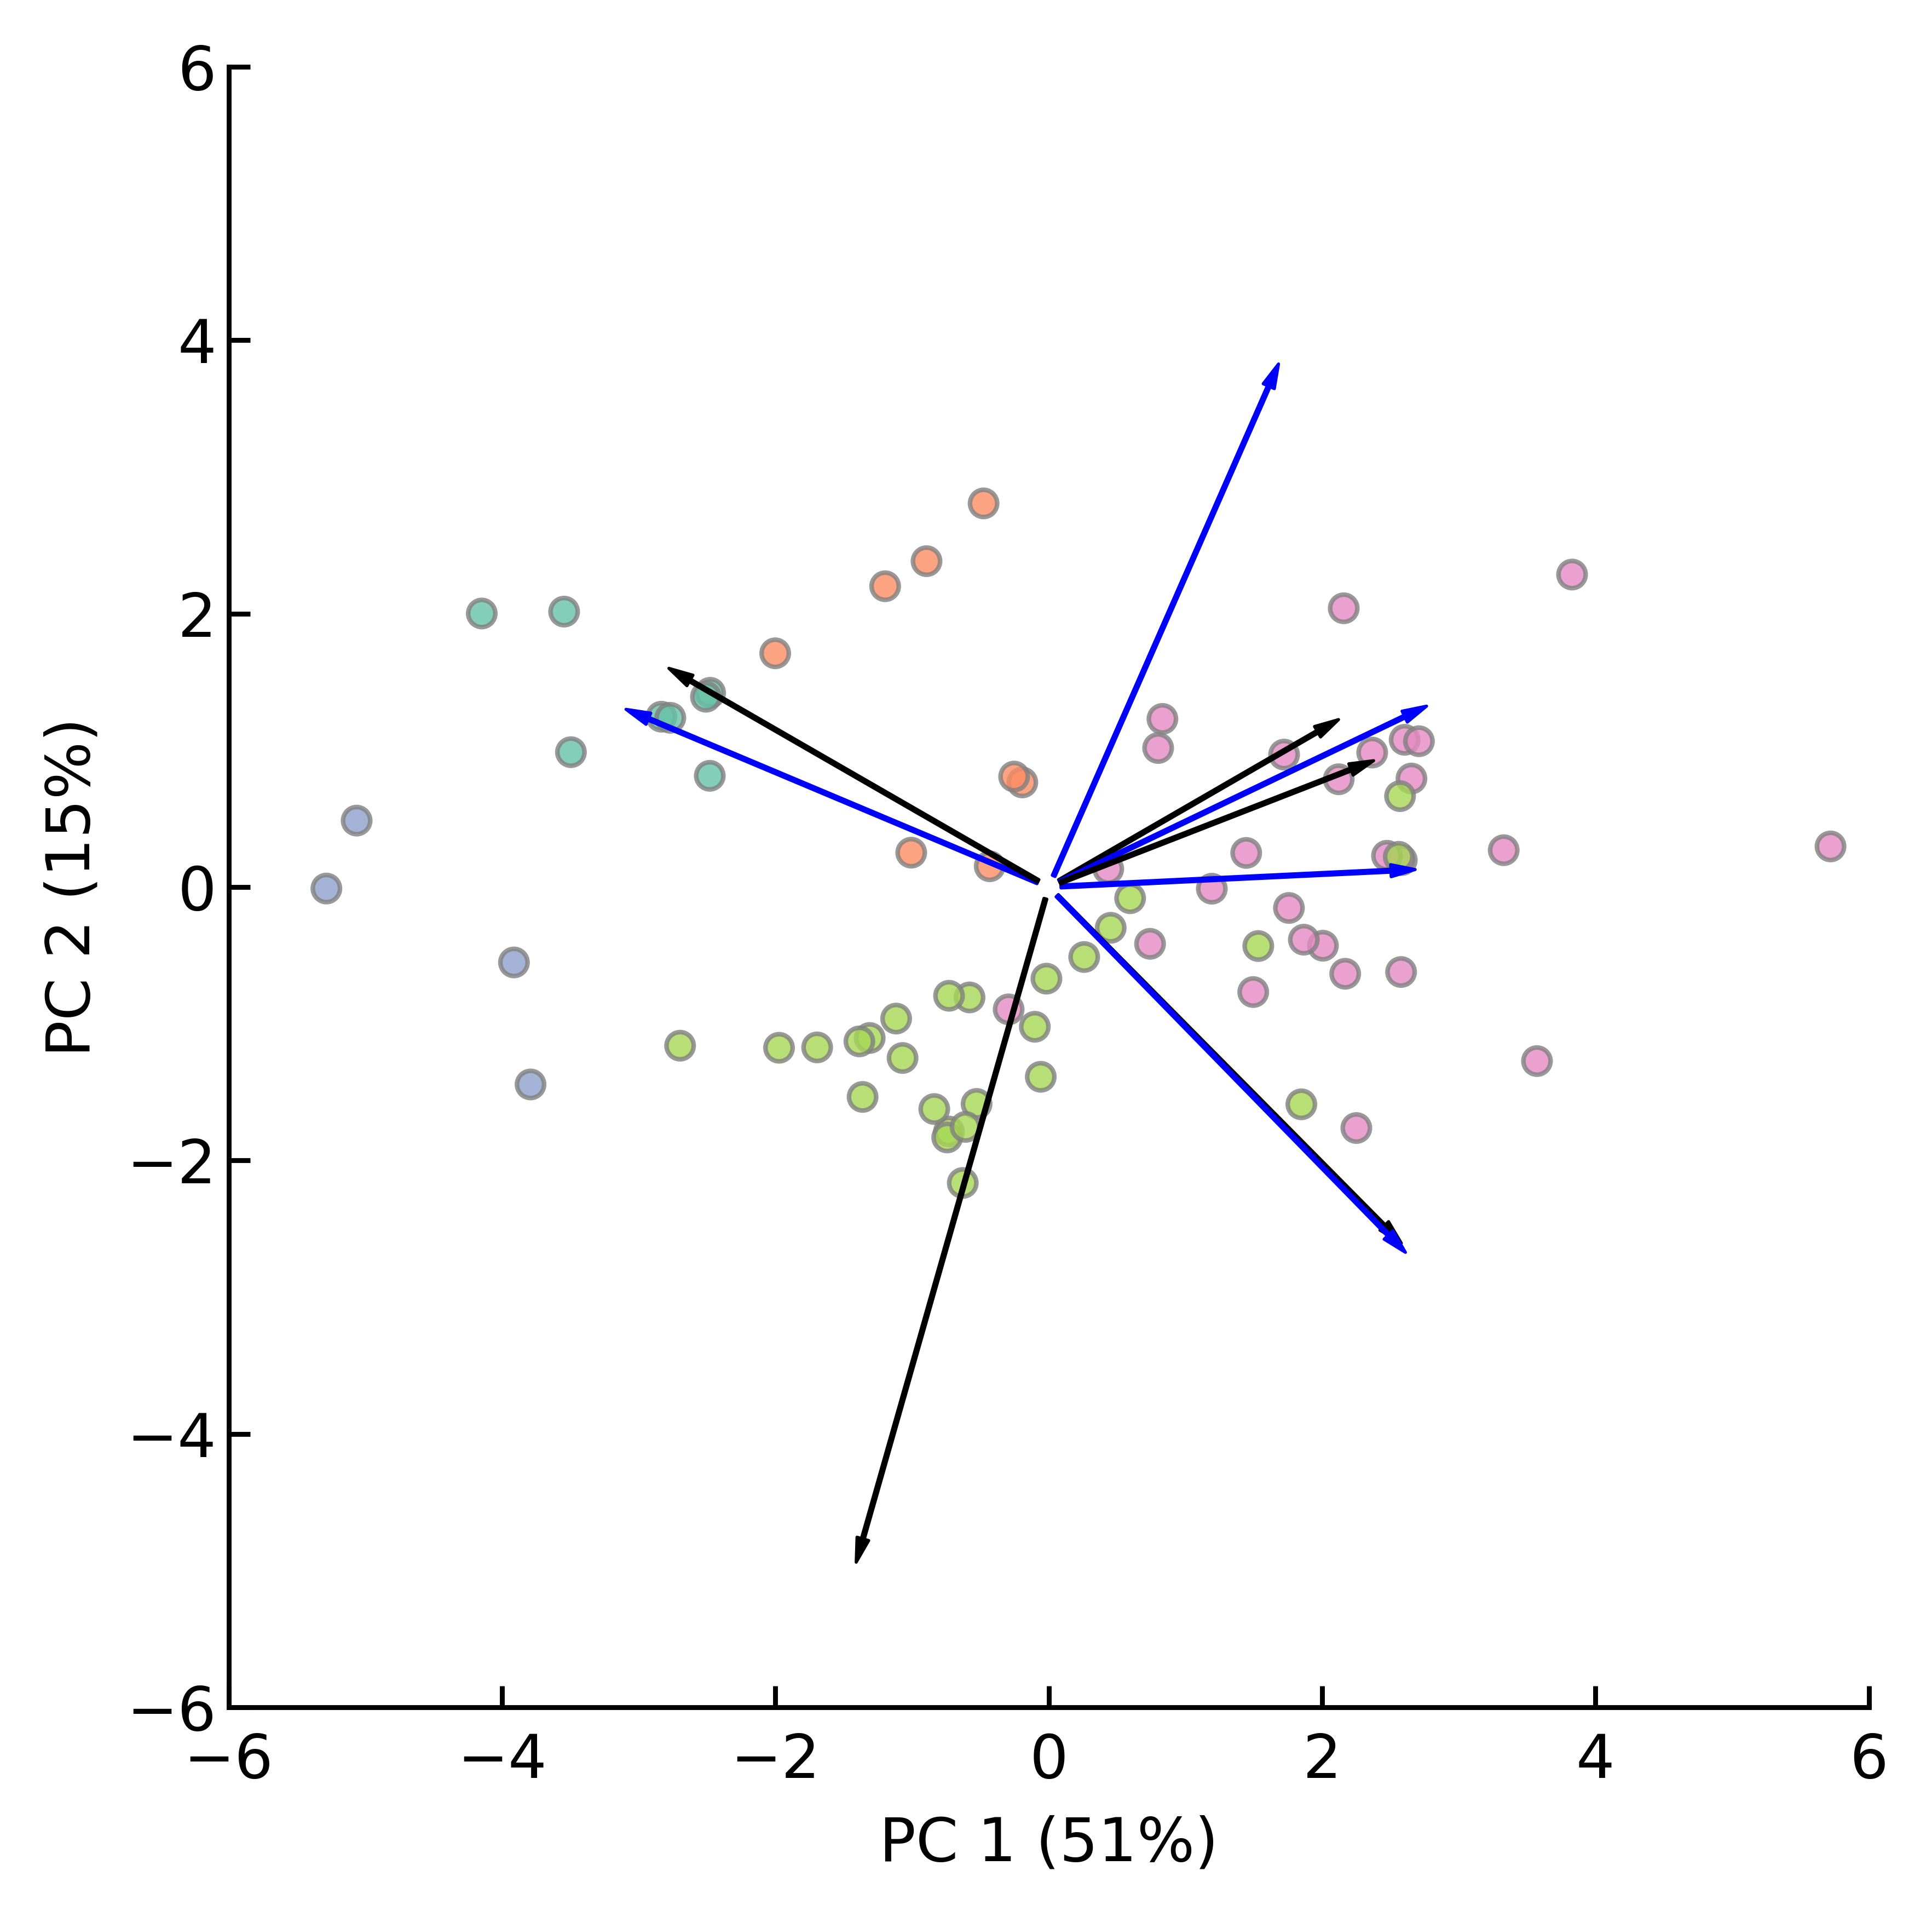

In [22]:
#plotting figure 1
x_size = 84*0.039370*1.5
y_size = 84*0.039370*1.5

fig, ax = plt.subplots(nrows=1,ncols=1, sharex=False,figsize=(x_size,y_size),dpi=800)
createOnePlot(df_scr_plnt,df_scr_plnt,'PC1','PC2','Species','Set2')
fig.patch.set_facecolor('white')

ax.set_xlabel('PC 1 (51%)')
ax.set_ylabel('PC 2 (15%)')
ax.axis('scaled')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.tick_params(axis="y",direction="in", pad=2)
ax.tick_params(axis="x",direction="in", pad=4)

scaling = 8
linewidth = 0.5

manualInputArrowWorkshop(df_plnt_arrow,"AminoAcids",'Gly','blue',-40,0,scaling,linewidth)
manualInputArrowWorkshop(df_plnt_arrow,"AminoAcids",'Thr','black',15,-6,scaling,linewidth)
manualInputArrowWorkshop(df_plnt_arrow,"AminoAcids",'Ser','black',-30,20,scaling,linewidth)
manualInputArrowWorkshop(df_plnt_arrow,"AminoAcids",'Pro','black',20,25,scaling,linewidth)
manualInputArrowWorkshop(df_plnt_arrow,"AminoAcids",'Asx','black',20,-15,scaling,linewidth)
manualInputArrowWorkshop(df_plnt_arrow,"AminoAcids",'Phe','blue',20,10,scaling,linewidth)
manualInputArrowWorkshop(df_plnt_arrow,"AminoAcids",'Glx','blue',10,-30,scaling,linewidth)
manualInputArrowWorkshop(df_plnt_arrow,"AminoAcids",'Val','blue',30,-10,scaling,linewidth)
manualInputArrowWorkshop(df_plnt_arrow,"AminoAcids",'Leu','blue',10,-2,scaling,linewidth)
manualInputArrowWorkshop(df_plnt_arrow,"AminoAcids",'Ala','black',30,-10,scaling,linewidth)

#placing legends in graph
#ax.legend(fontsize='8', labelspacing=0.01,frameon=False,loc=(0.625,0.835))

#removing top and right borders
ax.spines[['right', 'top']].set_visible(False)

#fig.savefig('fig2.svg', format='svg')
fig.savefig('figures\\workshopfigure.png',dpi=1000, format='png',bbox_inches="tight")

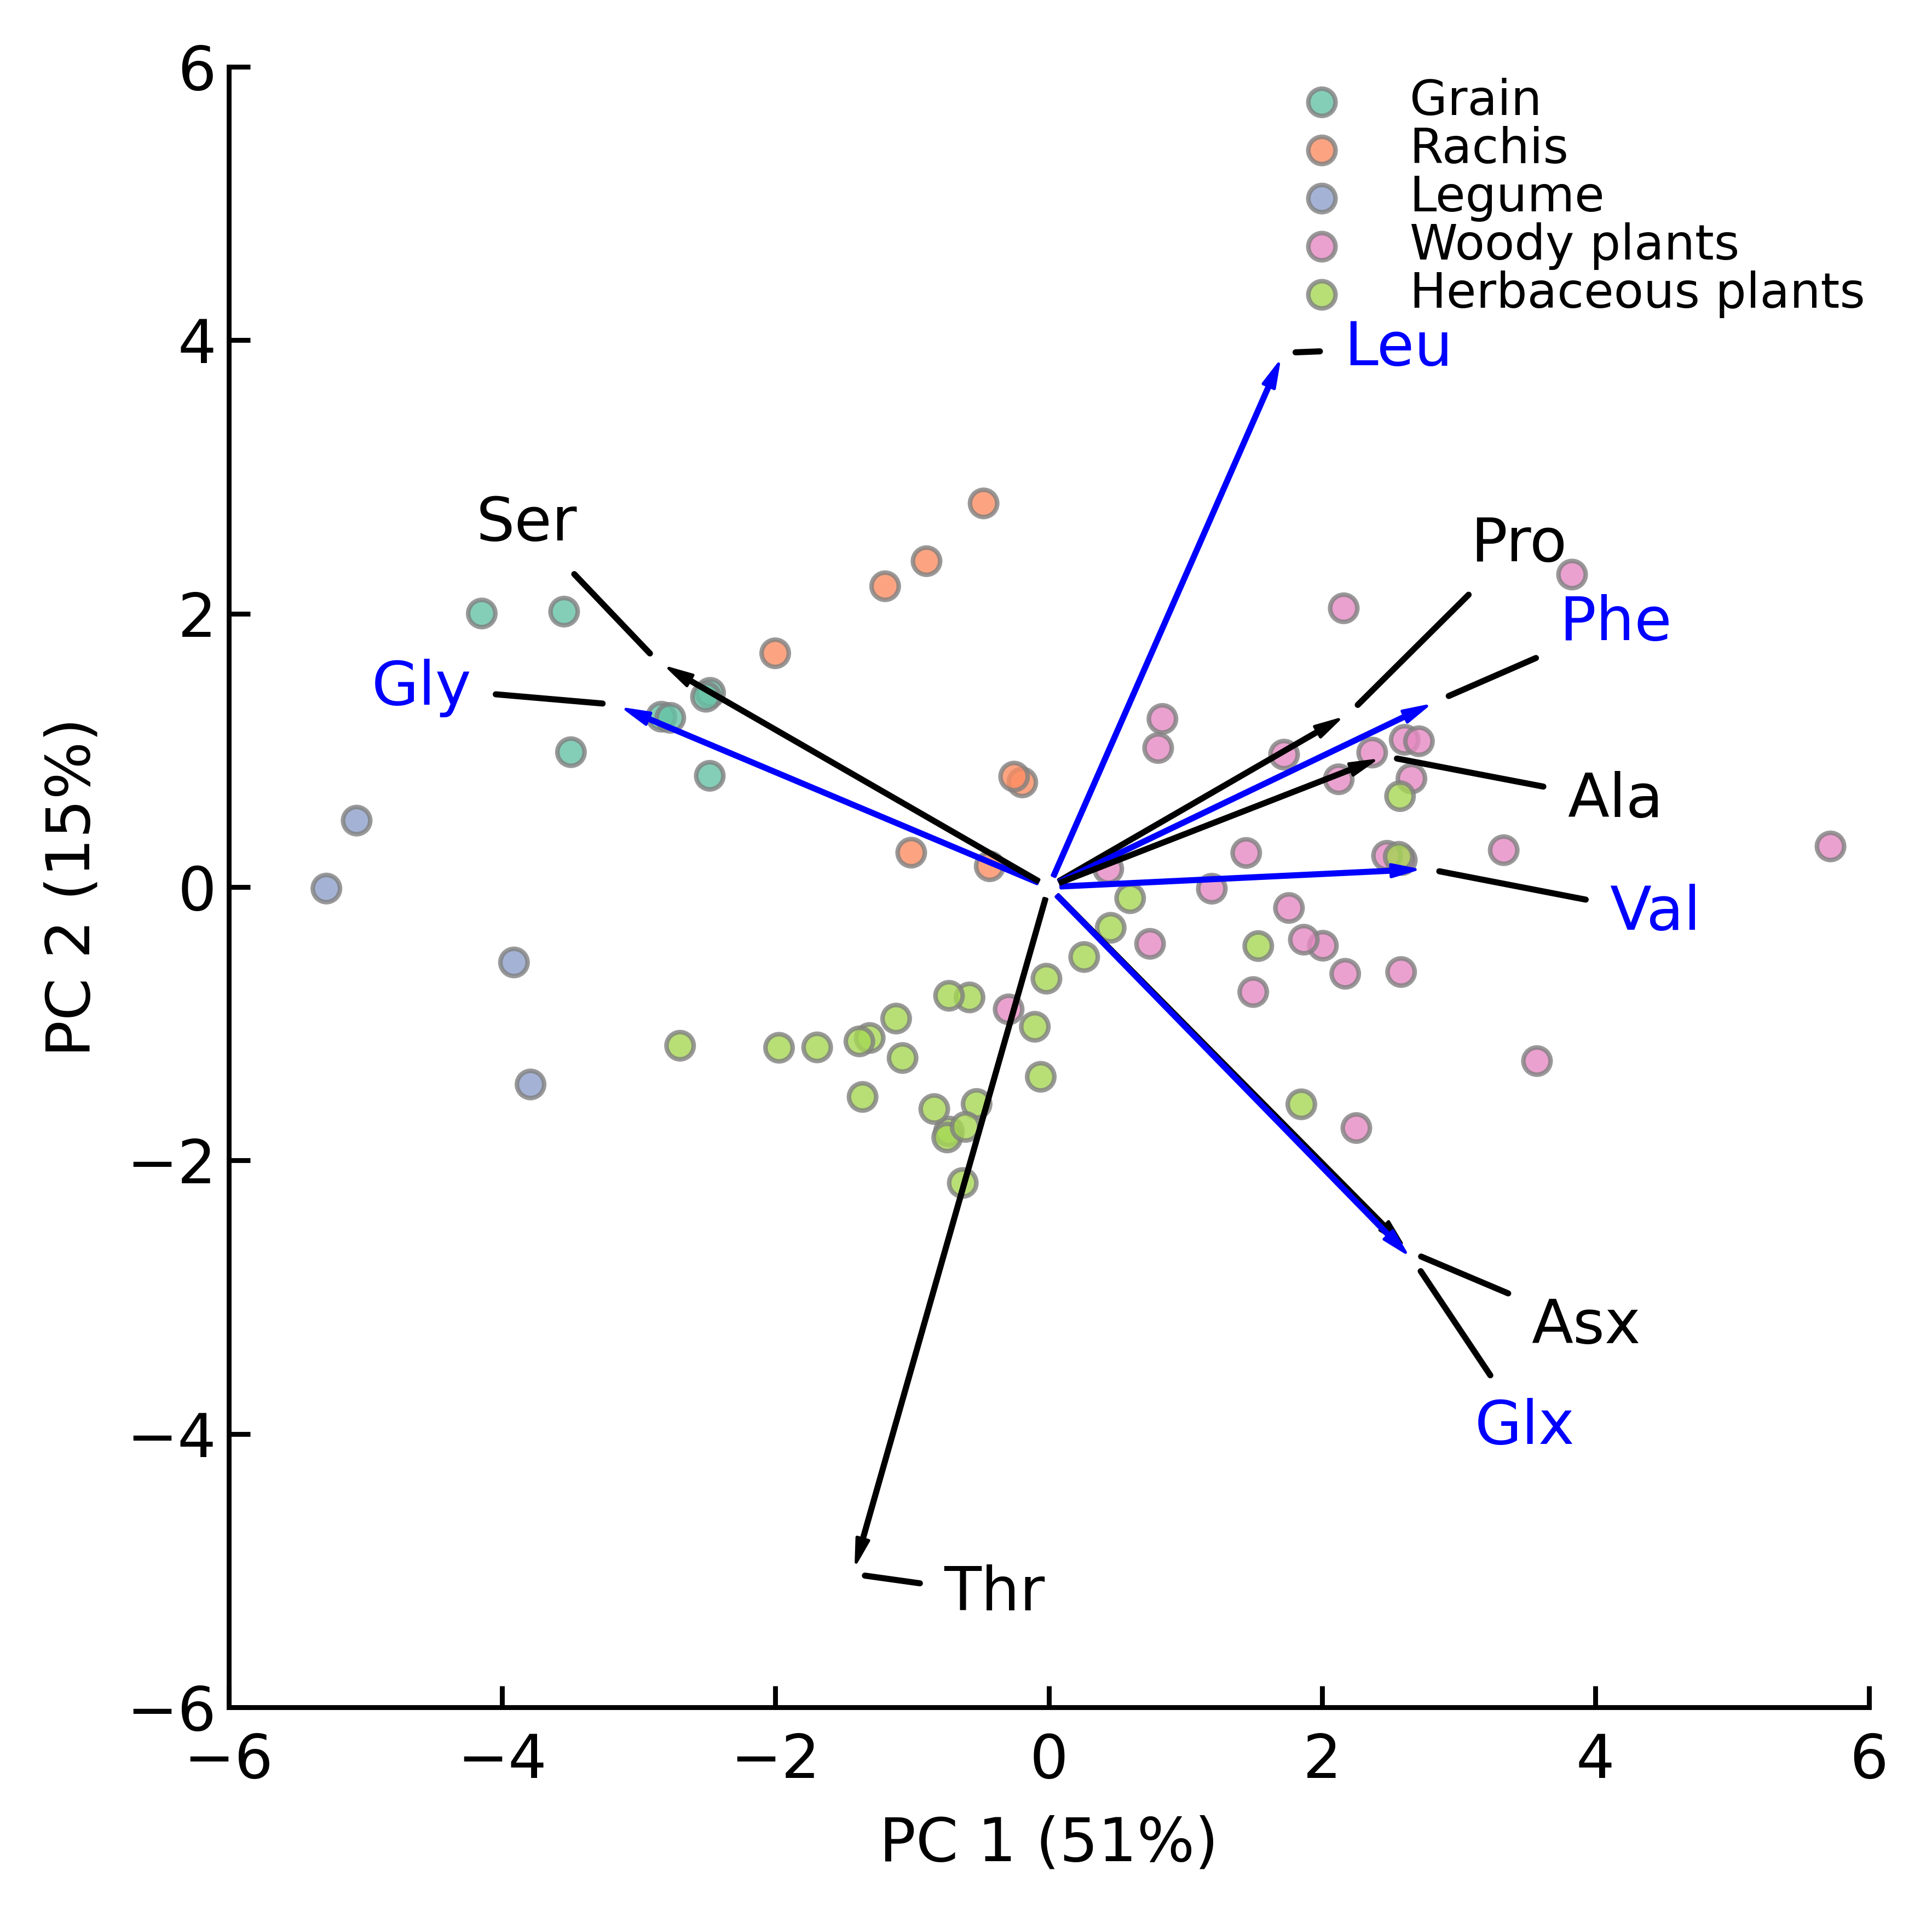

In [23]:
#plotting figure 1
x_size = 84*0.039370*1.5
y_size = 84*0.039370*1.5

fig, ax = plt.subplots(nrows=1,ncols=1, sharex=False,figsize=(x_size,y_size),dpi=800)
createOnePlot(df_scr_plnt,df_scr_plnt,'PC1','PC2','Species','Set2')
fig.patch.set_facecolor('white')

ax.set_xlabel('PC 1 (51%)')
ax.set_ylabel('PC 2 (15%)')
ax.axis('scaled')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.tick_params(axis="y",direction="in", pad=2)
ax.tick_params(axis="x",direction="in", pad=4)

scaling = 8
linewidth = 0.5

manualInputArrowOne(df_plnt_arrow,"AminoAcids",'Gly','blue',-40,0,scaling,linewidth)
manualInputArrowOne(df_plnt_arrow,"AminoAcids",'Thr','black',15,-6,scaling,linewidth)
manualInputArrowOne(df_plnt_arrow,"AminoAcids",'Ser','black',-30,20,scaling,linewidth)
manualInputArrowOne(df_plnt_arrow,"AminoAcids",'Pro','black',20,25,scaling,linewidth)
manualInputArrowOne(df_plnt_arrow,"AminoAcids",'Asx','black',20,-15,scaling,linewidth)
manualInputArrowOne(df_plnt_arrow,"AminoAcids",'Phe','blue',20,10,scaling,linewidth)
manualInputArrowOne(df_plnt_arrow,"AminoAcids",'Glx','blue',10,-30,scaling,linewidth)
manualInputArrowOne(df_plnt_arrow,"AminoAcids",'Val','blue',30,-10,scaling,linewidth)
manualInputArrowOne(df_plnt_arrow,"AminoAcids",'Leu','blue',10,-2,scaling,linewidth)
manualInputArrowOne(df_plnt_arrow,"AminoAcids",'Ala','black',30,-10,scaling,linewidth)

#placing legends in graph
ax.legend(fontsize='8', labelspacing=0.01,frameon=False,loc=(0.625,0.835))

#removing top and right borders
ax.spines[['right', 'top']].set_visible(False)

#fig.savefig('fig2.svg', format='svg')
fig.savefig('figures\\fig1_pca_revised.png',dpi=1000, format='png',bbox_inches="tight")

In [24]:
extra_data = pd.read_csv("data\\plants_aa_extra.csv")

In [25]:
#appending rows to Kendall and Styring plants with Paolini et al. 2015 and Soncin et al. 2021
#df_pca_new = pd.concat([df_pca,extra_data]).reset_index(drop=True)
df_pca_new = df_pca

#cleaning up plants to only have relevant rows
df_plnt_pca_clean = df_pca_new.loc[:,'Ala':]

#concatenating plants with animals
catal_pca = pd.concat([df_plnt_pca_clean,catal]).reset_index(drop=True)
mak_pca = pd.concat([df_plnt_pca_clean,mak]).reset_index(drop=True)
vah_pca = pd.concat([df_plnt_pca_clean,vah]).reset_index(drop=True)

In [26]:
#creating PCA model with plants
df_fin_plnt = standard_pca(df_plnt_pca_clean,master_pred_list,'Assignment')
df_fin_plnt = df_fin_plnt.rename(columns={'Assignment':'Species'})

In [27]:
#eigenvalue ratio from PCA
df_fin_plnt_stats = standard_pca(df_plnt_pca_clean,master_pred_list,'Assignment',stats=True)
print(df_fin_plnt_stats.explained_variance_ratio_)
print(df_fin_plnt_stats.explained_variance_)

[0.55687064 0.21340033 0.1128353  0.10308686 0.01380687]
[2.82302477 1.08182113 0.57201228 0.52259311 0.06999316]


In [28]:
pd.DataFrame(df_fin_plnt_stats.components_).to_csv("analyzed_data\\pca_loadings_fig3.csv")

projected!
projected!
projected!


C:\Users\Munch\AppData\Local\Temp\ipykernel_114860\1859025070.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(empty_string_labels_x)
C:\Users\Munch\AppData\Local\Temp\ipykernel_114860\1859025070.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(empty_string_labels_x)


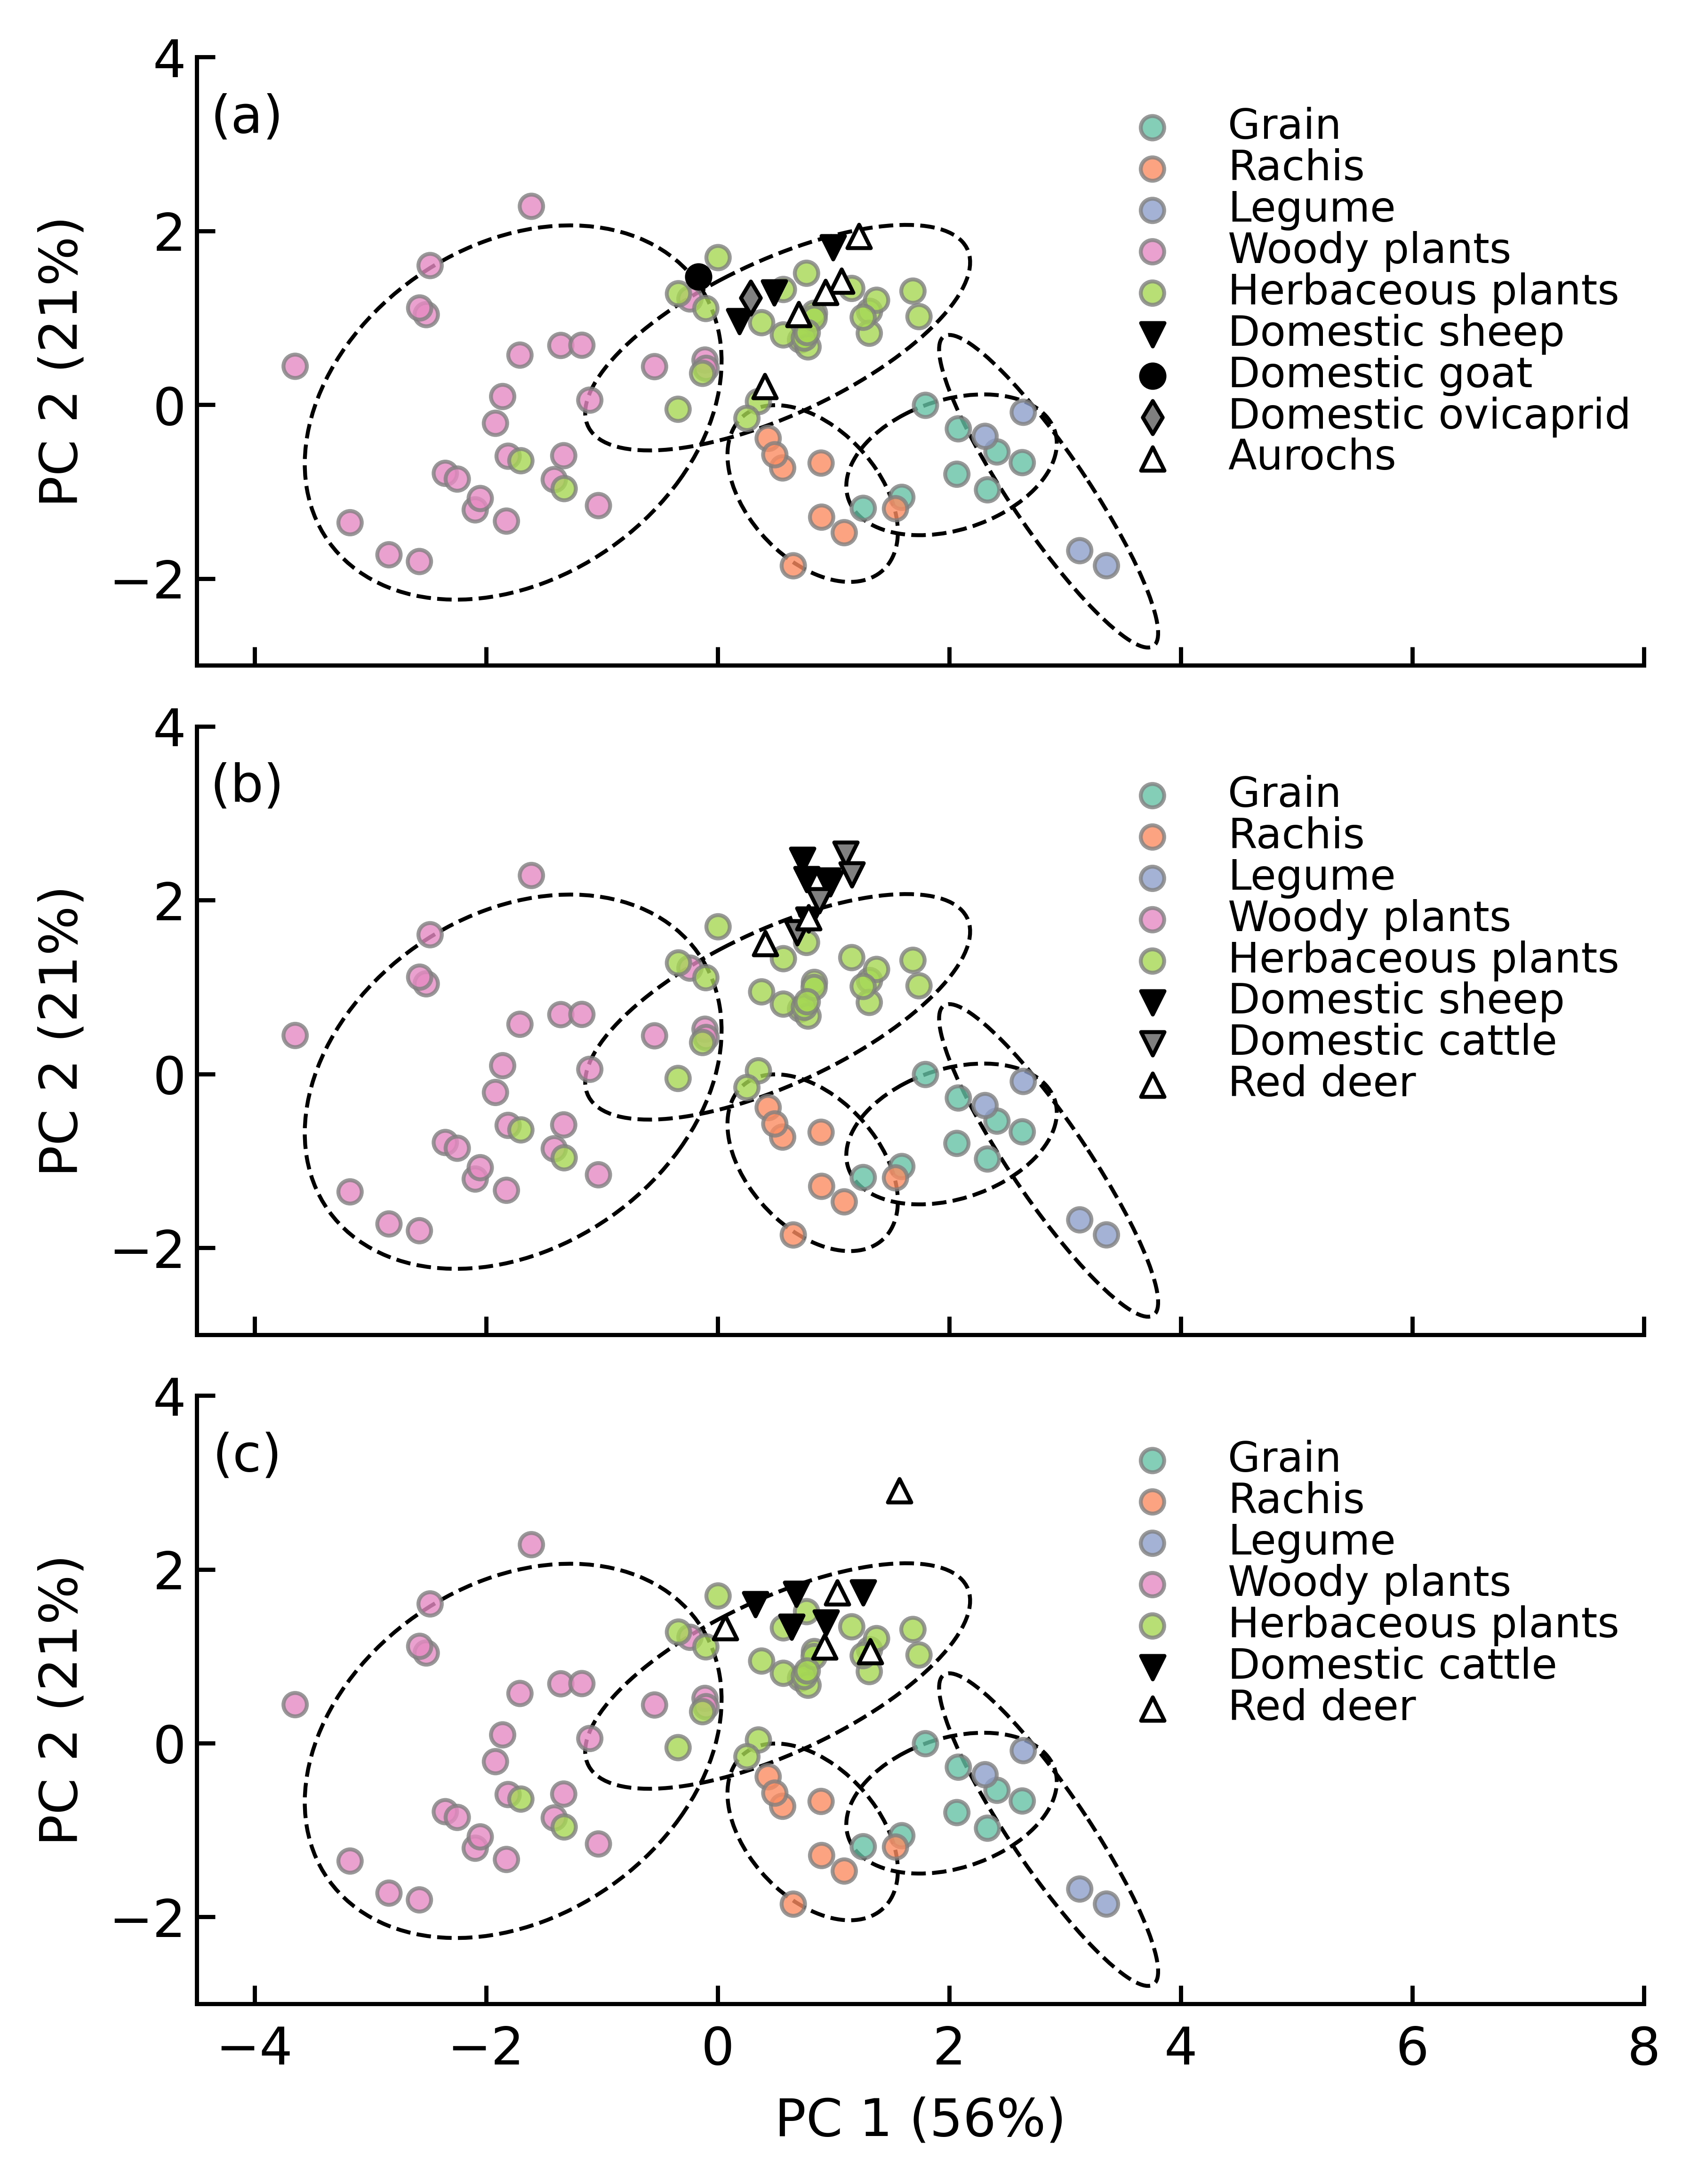

In [29]:
#projecting animal data with PCA model trained on plants data
df_scr_CH = standard_pca(catal_pca,master_pred_list,'Assignment',-1,1,projection=True,projection_limit=73,scale=True)
df_scr_MK = standard_pca(mak_pca,master_pred_list,'Assignment',-1,1,projection=True,projection_limit=73,scale=True)
df_scr_VH = standard_pca(vah_pca,master_pred_list,'Assignment',-1,1,projection=True,projection_limit=73,scale=True)

#making dataframes for plotting ellipses
df_scr_CH = df_scr_CH.rename(columns={'Assignment':'Species'})
df_to_ellipse_CH = df_scr_CH[['PC1','PC2','Species']]

df_scr_MK = df_scr_MK.rename(columns={'Assignment':'Species'})
df_to_ellipse_MK = df_scr_MK[['PC1','PC2','Species']]

df_scr_VH = df_scr_VH.rename(columns={'Assignment':'Species'})
df_to_ellipse_VH = df_scr_VH[['PC1','PC2','Species']]

#sizing figure
x_size = 84*0.039370*1.5
y_size = 174*0.039370
y_min, y_max = (-3,4)
x_min, x_max = (-4.5,8)
x_title, y_title = (0.035,0.825)
fontsize = 10

#initializing figure
fig, ax = plt.subplots(nrows=3,ncols=1, sharex=False,figsize=(x_size,y_size),dpi=800)
fig.subplots_adjust(hspace=0.1)
fig.patch.set_facecolor('white')

#plotting ellipses
keys = ['Woody plants', 'Grain', 'Herbaceous plants', 'Rachis', 'Legume']
plot_ellipses(df_to_ellipse_CH,keys,'Species',0)
plot_ellipses(df_to_ellipse_MK,keys,'Species',1)
plot_ellipses(df_to_ellipse_VH,keys,'Species',2)

#creating plots with manual input on the herbivores
createPlot(df_scr_CH,df_fin_plnt,'PC1','PC2','Species',0,'Set2',alpha=0.8,marker='o',s=20)
manualInput(df_scr_CH,'Species','Domestic sheep','black','v',0)
manualInput(df_scr_CH,'Species','Domestic goat','black','o',0)
manualInput(df_scr_CH,'Species','Domestic ovicaprid','grey','d',0)
manualInput(df_scr_CH,'Species','Aurochs','white','^',0)

#ax[0][0].legend(loc=(1,0))
ax[0].set_ylabel('PC 2 (21%)',fontsize=fontsize)
#ax[0].axis('equal')
ax[0].set_xlim(x_min,x_max)
ax[0].set_ylim(y_min,y_max)
ax[0].set_title('(a)',x=x_title,y=y_title,fontsize=fontsize)
ax[0].tick_params(axis="y",direction="in", pad=2,labelsize=fontsize)
ax[0].tick_params(axis="x",direction="in", pad=4,labelsize=fontsize)

createPlot(df_scr_MK,df_fin_plnt,'PC1','PC2','Species',1,'Set2',alpha=0.8,marker='o',s=20)
manualInput(df_scr_MK,'Species','Domestic sheep','black','v',1)
manualInput(df_scr_MK,'Species','Domestic cattle','grey','v',1)
manualInput(df_scr_MK,'Species','Red deer','white','^',1)
ax[1].set_ylabel('PC 2 (21%)',fontsize=fontsize)
#ax[1].axis('equal')
ax[1].set_xlim(x_min,x_max)
ax[1].set_ylim(y_min,y_max)
ax[1].set_title('(b)',x=x_title,y=y_title,fontsize=fontsize)
ax[1].tick_params(axis="y",direction="in", pad=2,labelsize=fontsize)
ax[1].tick_params(axis="x",direction="in", pad=4,labelsize=fontsize)

createPlot(df_scr_VH,df_fin_plnt,'PC1','PC2','Species',2,'Set2',alpha=0.8,marker='o',s=20)
manualInput(df_scr_VH,'Species','Domestic cattle','black','v',2)
manualInput(df_scr_VH,'Species','Red deer','white','^',2)
#ax[1][0].legend(loc=(1,0))
ax[2].set_xlabel('PC 1 (56%)',fontsize=fontsize)
ax[2].set_ylabel('PC 2 (21%)',fontsize=fontsize)
#ax[2].axis('equal')
ax[2].set_xlim(x_min,x_max)
ax[2].set_ylim(y_min,y_max)
ax[2].set_title('(c)',x=x_title,y=y_title,fontsize=fontsize)
ax[2].tick_params(axis="y",direction="in", pad=2,labelsize=fontsize)
ax[2].tick_params(axis="x",direction="in", pad=4,labelsize=fontsize)

#setting legends
ax[0].legend(fontsize='8', labelspacing=0.01,frameon=False,loc=(0.62,0.28))
ax[1].legend(fontsize='8', labelspacing=0.01,frameon=False,loc=(0.62,0.35))
ax[2].legend(fontsize='8', labelspacing=0.01,frameon=False,loc=(0.62,0.425))

#turning visibility off for redundant axis ticks
labels_x = [item.get_text() for item in ax[0].get_xticklabels()]
empty_string_labels_x = ['']*len(labels_x)
ax[0].set_xticklabels(empty_string_labels_x)
ax[1].set_xticklabels(empty_string_labels_x)

#removing top and right borders
ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)
ax[2].spines[['right', 'top']].set_visible(False)

#fig.savefig('figx.svg', format='svg')
fig.savefig('figures\\pca_Rev3.png',dpi=1000, format='png',bbox_inches="tight")

In [30]:
df_scr_VH.to_csv('analyzed_data\\pca_scores_r2_VH.csv')

In [31]:
domestic_condition_CH = (df_scr_CH['Species']=='Domestic sheep')|(df_scr_CH['Species']=='Domestic goat')|(df_scr_CH['Species']=='Domestic ovicaprid')

domestic_ck = df_scr_CH.loc[domestic_condition_CH, ['PC1',"PC2"]]
wild_ck = df_scr_CH.loc[df_scr_CH['Species']=='Aurochs', ['PC1',"PC2"]]

print("output for catal: ")
hotellings_T_squared(domestic_ck, wild_ck, maha = True)

#True for sheep or cattle
domestic_condition_MK = (df_scr_MK['Species']=='Domestic sheep')|(df_scr_MK['Species']=='Domestic cattle')

domestic_mk = df_scr_MK.loc[domestic_condition_MK, ['PC1',"PC2"]]
wild_mk = df_scr_MK.loc[df_scr_MK['Species']=='Red deer', ['PC1',"PC2"]]

print("output for mak: ")
hotellings_T_squared(domestic_mk, wild_mk,maha = True)

domestic_vh = df_scr_VH.loc[df_scr_VH['Species']=='Domestic cattle', ['PC1',"PC2"]]
wild_vh = df_scr_VH.loc[df_scr_VH['Species']=='Red deer', ['PC1',"PC2"]]

print("output for vah: ")
hotellings_T_squared(domestic_vh, wild_vh,maha = False)

output for catal: 
Mahalanobis distance: 2.30872730904943
Test statistic: 5.829930080133492
Degrees of freedom: 2 and 7
p-value: 0.03233432456854146
output for mak: 
Mahalanobis distance: 1.8887757956711115
Test statistic: 2.5945265500458476
Degrees of freedom: 2 and 8
p-value: 0.13536471739766798
output for vah: 
Test statistic: 0.2316324089721457
Degrees of freedom: 2 and 7
p-value: 0.799083491225328


(0.2316324089721457, 0.799083491225328)

In [32]:
####LINEAR DISCRMINANT ANALYSIS BELOW###

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
df_lda = round(df_pca_new.loc[:72,:],2)
df_animals_lda = pd.read_csv("data\\herbivore_aa.csv")
df_lda.tail(10)

Species  Part Manure   Ala   Asx   Glx   Gly   Leu   Phe   Pro  \
63  Lathyrus tuberosus     4  V-032  2.34  4.74  3.54 -6.16 -1.46  6.54  4.24   
64     Stellaria media     4  V-038 -1.84  2.56  2.46 -7.94 -1.44  7.36  1.86   
65      Lolium perenne     4  V-052 -0.87  1.63  1.23 -4.67 -2.67  6.73  0.93   
66      Lolium perenne     4  V-053  0.02  2.82  2.42 -5.48 -2.38  6.92  1.82   
67      Lolium perenne     4  V-054  0.52  2.52  1.02 -5.68 -2.88  7.42  2.12   
68      Lolium perenne     4  V-055  0.31  2.11  1.81 -5.79 -2.49  5.31  0.81   
69      Lolium perenne     4  V-056  0.49  2.19  1.39 -5.11 -2.41  5.39  2.39   
70      Lolium perenne     4  V-057  0.15  2.45  1.35 -5.15 -2.05  5.95  1.25   
71      Lolium perenne     4  V-058  0.59  2.69  1.59 -4.61 -2.11  5.69  1.39   
72      Lolium perenne     4  V-059  0.01  2.41  1.31 -6.29 -2.19  6.71  2.81   

     Ser    Thr   Val         Assignment  
63 -5.86 -10.86  2.94  Herbaceous plants  
64 -6.54   1.26  2.26  Herbaceous plants  
65 -3.57   1.03  0.23  Herbaceous plants  
66 -6.18  -0.38  0.42  Herbaceous plants  
67 -5.88  -0.08  0.92  Herbaceous plants  
68 -4.99   1.21  1.71  Herbaceous plants  
69 -5.41   0.09  0.99  Herbaceous plants  
70 -4.85   0.65  0.25  Herbaceous plants  
71 -5.11  -0.31  0.19  Herbaceous plants  
72 -5.29  -0.39  0.91  Herbaceous plants

In [35]:
#only select control cattle
df_animals_lda = df_animals_lda[df_animals_lda['Species'] == "Control cattle"].reset_index()

In [36]:
#selecting X and Y values for plants and animals
X = df_lda[master_pred_list]
y = df_lda["Part"]
#y = df_lda['Assignment']

X_anim = df_animals_lda[master_pred_list]
y_anim = df_animals_lda["Assignment"]

In [37]:
#initializing lda
lda = LinearDiscriminantAnalysis()
#scaler = StandardScaler()
#X = pd.DataFrame(scaler.fit_transform(X),columns=cols)
#X_anim = pd.DataFrame(scaler.fit_transform(X_anim),columns=cols)

lda_stats = lda.fit(X=X,y=y)
lda_t = lda.fit_transform(X,y)

In [38]:
#generating predictions
predicted_values = lda.predict_proba(X_anim)*100
predictions = pd.DataFrame(predicted_values.round(2))
predictions.to_csv("analyzed_data\\predictions2_rev2_2.csv")
print(predictions)

       0      1    2     3      4
0   0.01   0.02  0.0  0.01  99.95
1   0.07   0.19  0.0  0.02  99.72
2   0.01   0.03  0.0  0.00  99.95
3   0.77   6.10  0.0  0.07  93.07
4   0.02   0.04  0.0  0.01  99.93
5   0.02   0.04  0.0  0.01  99.93
6   0.14   0.30  0.0  0.02  99.55
7   0.02   0.05  0.0  0.00  99.92
8   1.47   9.01  0.0  0.06  89.46
9   0.03   0.07  0.0  0.01  99.90
10  0.04   0.05  0.0  0.01  99.90
11  0.27   0.43  0.0  0.01  99.29
12  0.05   0.07  0.0  0.00  99.88
13  2.63  12.54  0.0  0.05  84.78
14  0.06   0.10  0.0  0.00  99.84


In [39]:
#transforming animal values based on model and creating dataframe of x and y values
animals_transformed = lda.transform(X_anim)
animals_plot = pd.concat([pd.Series(y_anim),pd.DataFrame(animals_transformed[:,:2])*-1],join="inner",axis=1)

In [40]:
#returning ld coefficients
coefficients = pd.DataFrame(lda.scalings_)
#coefficients.to_csv("scalings_new_R2.csv")
coefficients

0         1         2         3
0 -0.174476  0.184342 -0.018238 -0.200405
1  0.297512  1.536303 -0.103275  0.360692
2  0.167024  0.382621 -0.369941 -0.494382
3  0.030416  0.397309  0.170149 -0.319615
4  0.408572 -0.082928  0.237299 -0.274713

In [41]:
lda_stats.explained_variance_ratio_

array([0.74848336, 0.20067283, 0.04750393, 0.00333988])

In [42]:
#codeblock generating prediction lines in LDA
lda2 = LinearDiscriminantAnalysis()
lda2.fit(lda_t[:,:2]*-1,y)

#defining grid boundaries
min1,max1 = lda_t[:,0].min()-1, lda_t[:,0].max()+1
min2,max2 = lda_t[:,1].min()-1,lda_t[:,1].max()+1

#making a grid
x1grid = np.linspace(min1,max1,2000)
x2grid = np.linspace(min2,max2,2000)
xx,yy = np.meshgrid(x1grid,x2grid)

r1,r2 = xx.flatten(),yy.flatten()
r1,r2 = r1.reshape((len(r1),1)), r2.reshape((len(r2),1))
grid = np.hstack((r1,r2))

#performing the same numerical solution in asking the model to predict over the grid space
yhat = lda2.predict(grid)

#trying to make rgb work
rgb_values = sns.color_palette('Set2',len(set(y))-1)

#reshaping into dimensions appropriate for contour plot
zz = yhat.reshape(xx.shape)

In [43]:
#using crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(estimator=lda, X=X, y=y, cv=loo)
scores.mean()
print('Accuracy:' ,scores.mean(),scores.sum(),len(scores),X.index)

Accuracy: 0.8904109589041096 65.0 73 RangeIndex(start=0, stop=73, step=1)


In [44]:
#generating prediction results for the training data
prediction_train = round(pd.DataFrame(lda_stats.predict_proba(X),columns=lda_stats.classes_),2)
prediction_train.to_csv("analyzed_data\\predictions_train_2.csv")

In [45]:
#getting classification report on the training data
from sklearn.metrics import confusion_matrix, classification_report, precision_score
pred = lda_stats.predict(X)
report = classification_report(y, pred, output_dict=True)
pd.DataFrame(report).transpose().to_csv('analyzed_data\\summary statistics_rev2.csv')

C:\Users\Munch\AppData\Local\Temp\ipykernel_114860\3302064253.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(empty_string_labels_x)


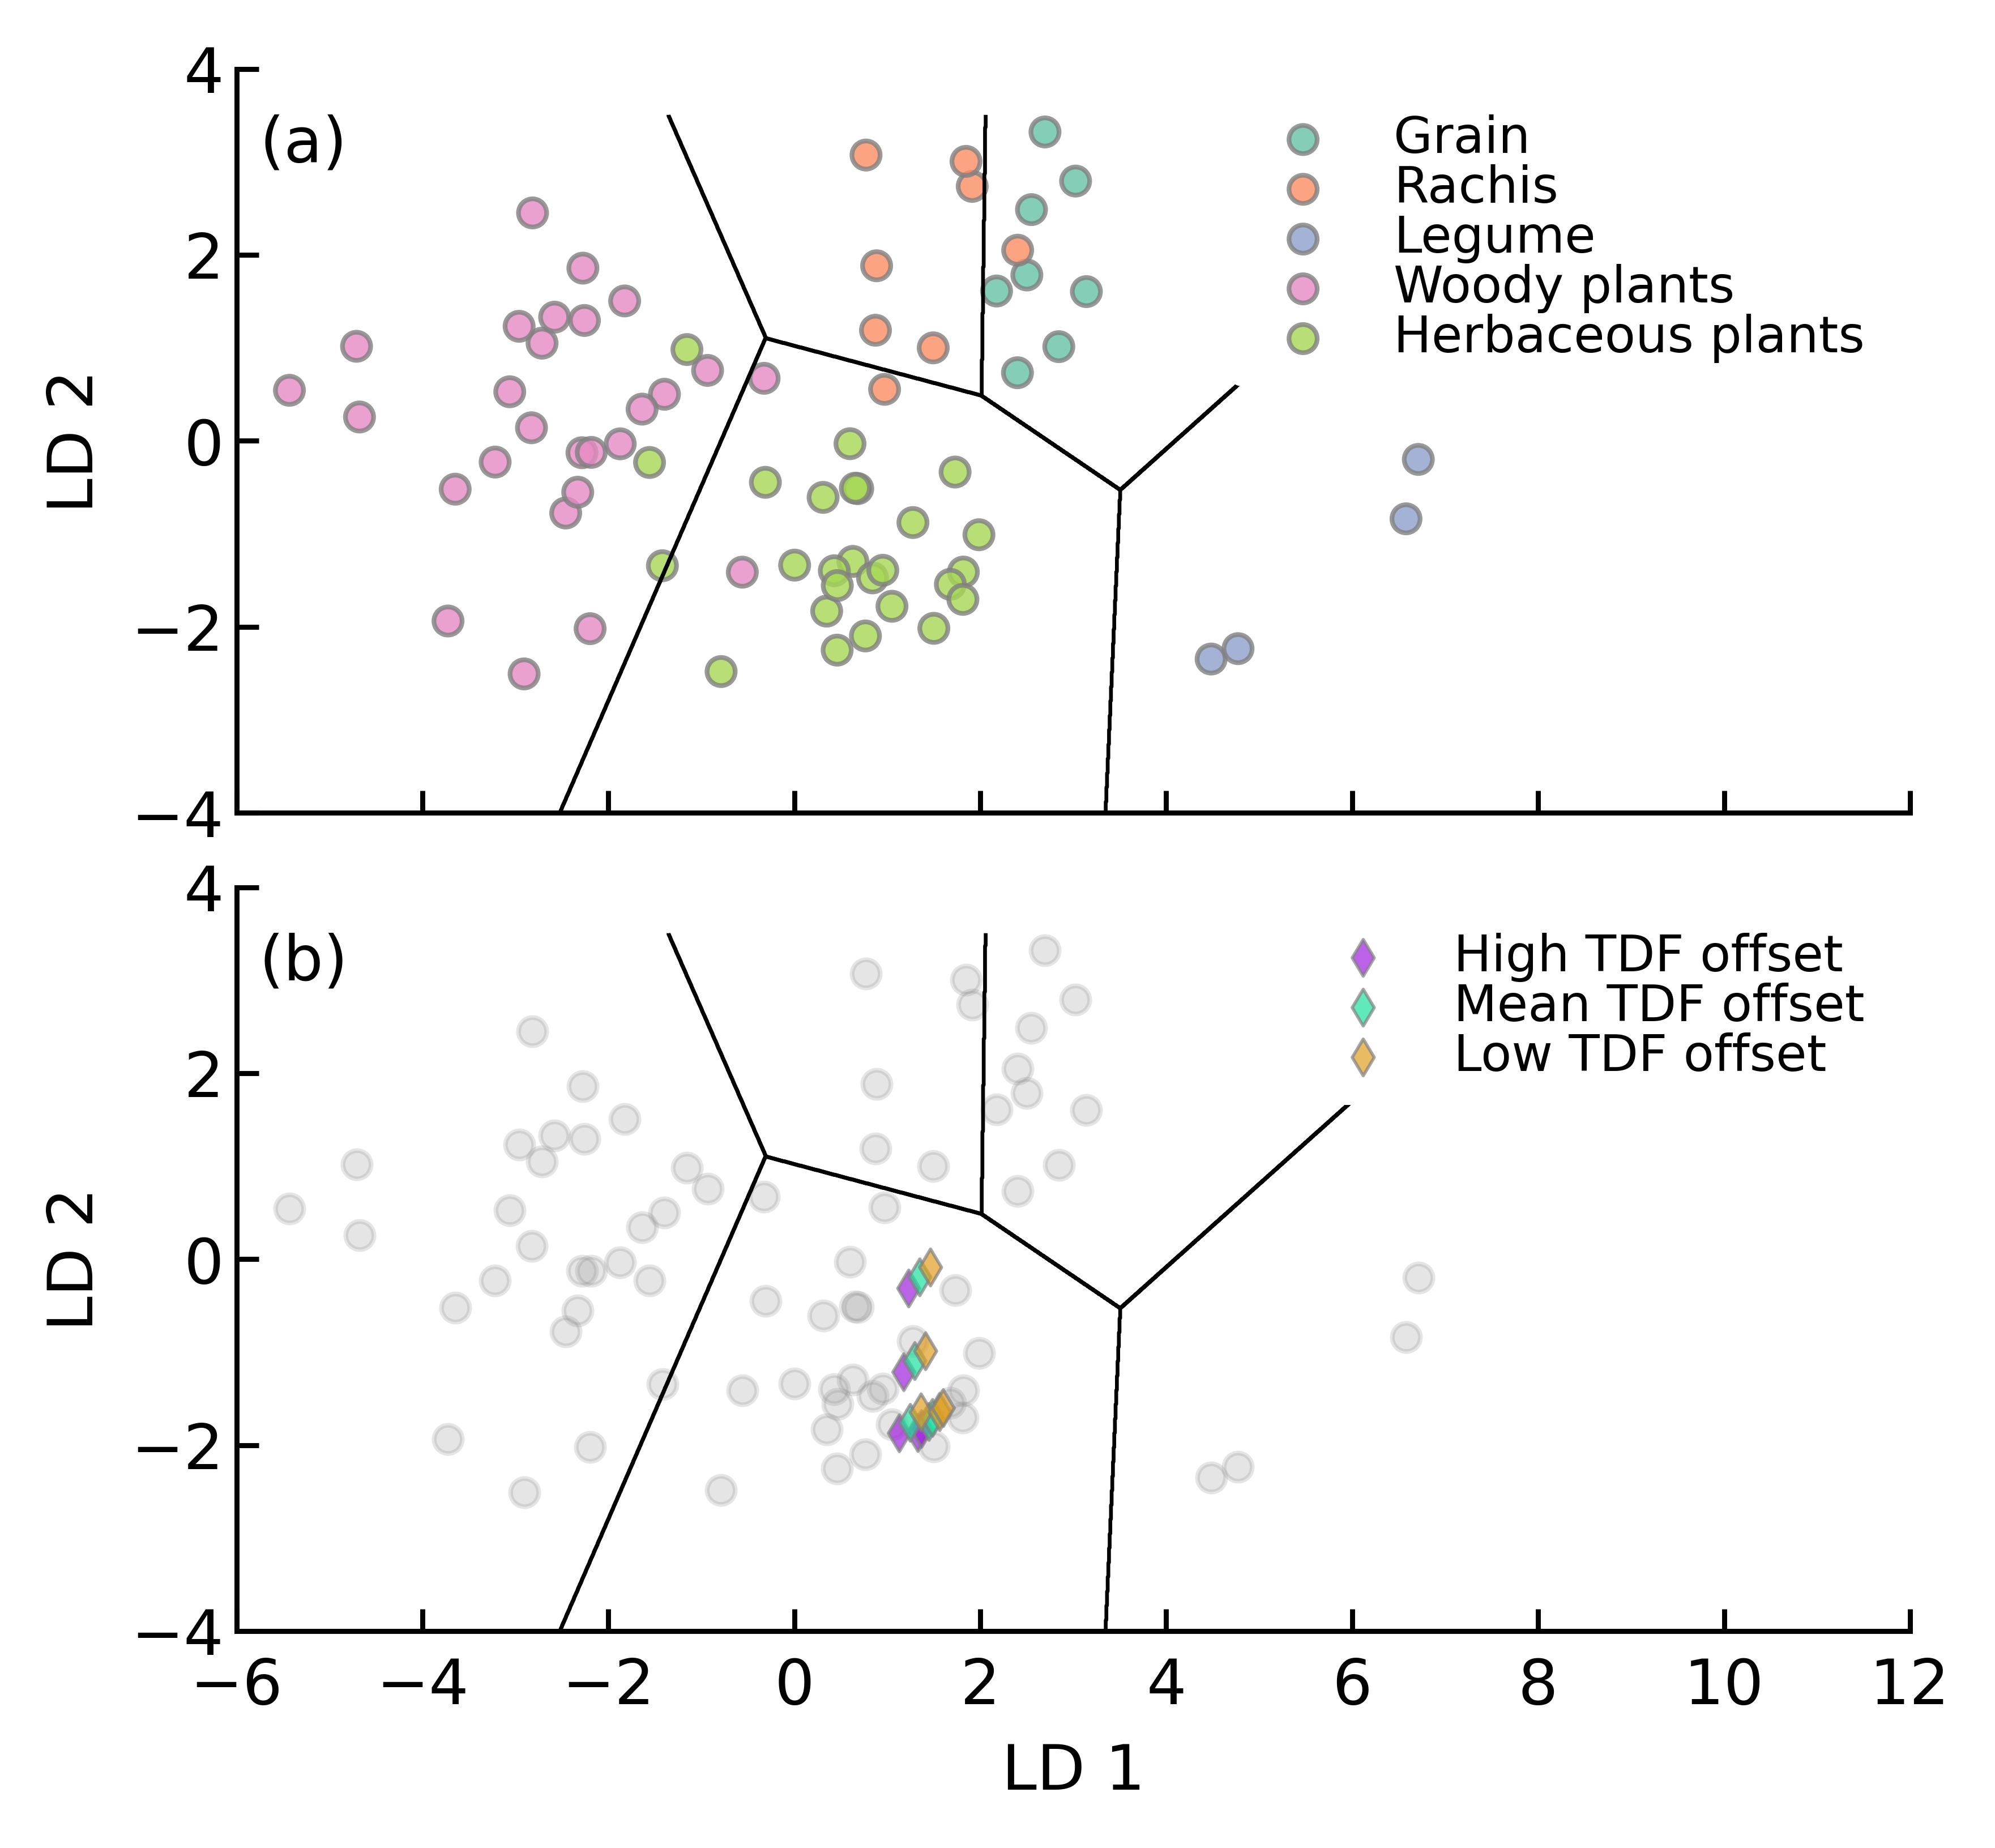

In [46]:
x_size = 84*0.039370*1.5
y_size = 174*0.039370*(2/3)
fontsize=10

fig, ax = plt.subplots(nrows=2,ncols=1, sharex=False,figsize=(x_size,y_size),dpi=800)
fig.subplots_adjust(hspace=0.1)
fig.patch.set_facecolor('white')

#making the x axis only integer values
from matplotlib.ticker import MaxNLocator
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))

df_plot = pd.concat(
    [pd.Series(y),(pd.DataFrame(lda_t[:,:2])*-1),df_lda['Assignment']],
    join="inner",axis=1)

#creating plants plot
createPlot(
    df_plot,df_lda,0,1,'Assignment',0,
    palette='Set2',alpha=0.8,marker='o',s=20)

ax[0].contour(xx,yy,zz,levels=2,colors='black',alpha=1,linewidths=0.6)
#ax[0].set_xlabel('LD 1')
ax[0].set_ylabel('LD 2', fontsize=fontsize)
ax[0].axis('scaled')
ax[0].set_xlim(-6,12)
ax[0].set_ylim(-4,4)
ax[0].set_title('(a)',x=0.04,y=0.825,fontsize=fontsize)
ax[0].tick_params(axis="y",direction="in", pad=2,labelsize=fontsize)
ax[0].tick_params(axis="x",direction="in", pad=4,labelsize=fontsize)

#creating plants plot with animals projected on
createPlot(
    df_plot,df_lda,0,1,axIndex=1,
    palette=['grey'],alpha=0.2,marker='o',s=20)

createPlot(
    animals_plot,df_animals_lda,0,1,"Assignment",1,
    palette=['#9E1FE0','#1FE09E','#E09E1F'],alpha=0.7,marker='d',s=17,
    edgecolor=(0.5019, 0.5019, 0.5019, 0.01),linewidth=0.5)

ax[1].contour(xx,yy,zz,levels=2,colors='black',alpha=1,linewidths=0.6)
ax[1].set_xlabel('LD 1', fontsize=fontsize)
ax[1].set_ylabel('LD 2', fontsize=fontsize)
ax[1].axis('scaled')
ax[1].set_xlim(-6,12)
ax[1].set_ylim(-4,4)
ax[1].set_title('(b)',x=0.04,y=0.825,fontsize=fontsize)
ax[1].tick_params(axis="y",direction="in", pad=2,labelsize=fontsize)
ax[1].tick_params(axis="x",direction="in", pad=4,labelsize=fontsize)

#setting legend
ax[0].legend(fontsize=8, labelspacing=0.01,frameon=True,loc='best',framealpha=1,edgecolor='white')
ax[1].legend(fontsize=8, labelspacing=0.01,frameon=True,loc='best',framealpha=1,edgecolor='white')
#ax[0].legend(fontsize='8', labelspacing=0.01,frameon=False,loc=(0.625,0.575))
#ax[1].legend(fontsize='8', labelspacing=0.01,frameon=False,loc=(0.625,0.5))

#getting rid of redundant labels
labels_x = [item.get_text() for item in ax[0].get_xticklabels()]
empty_string_labels_x = ['']*len(labels_x)
ax[0].set_xticklabels(empty_string_labels_x)

#setting top and right border to be invisible
ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)

#fig.savefig('lda.svg', format='svg')
fig.savefig('figures\\lda_Rev2_diamond_2_revised.png',dpi=1000, format='png',bbox_inches="tight")

In [47]:
##creating dataframes for fig 5##
mak_violin = mak_pca.iloc[[73,74,75,76,77,80,81,82,83],:]
mak_violin = mak_violin.melt(
    id_vars = ['Assignment'],
    value_vars = ['Ala', 'Asx', 'Glx', 'Gly', 'Leu', 'Phe', 'Pro', 'Ser', 'Thr', 'Val'], 
    var_name ='AAs')

vah_violin = vah_pca.iloc[73:,:]
vah_violin.loc[:,'Assignment'] = 'Non-outlier'
vah_violin.loc[78,'Assignment'] = 'Outlier'
vah_violin = vah_violin.melt(
    id_vars = ['Assignment'],
    value_vars = ['Ala', 'Asx', 'Glx', 'Gly', 'Leu', 'Phe', 'Pro', 'Ser', 'Thr', 'Val'], 
    var_name ='AAs')

df_herbaceous = round(pd.read_excel("data\\plants_aa_herbaceous_only.xlsx"),2)
df_herbaceous = df_herbaceous.melt(id_vars = ['Assignment'], value_vars = ['Ala', 'Asx', 'Glx', 'Gly', 'Leu', 'Phe', 'Pro', 'Ser', 'Thr', 'Val'], var_name ='AAs')

C:\Users\Munch\AppData\Local\Temp\ipykernel_114860\3272082922.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vah_violin.loc[:,'Assignment'] = 'Non-outlier'


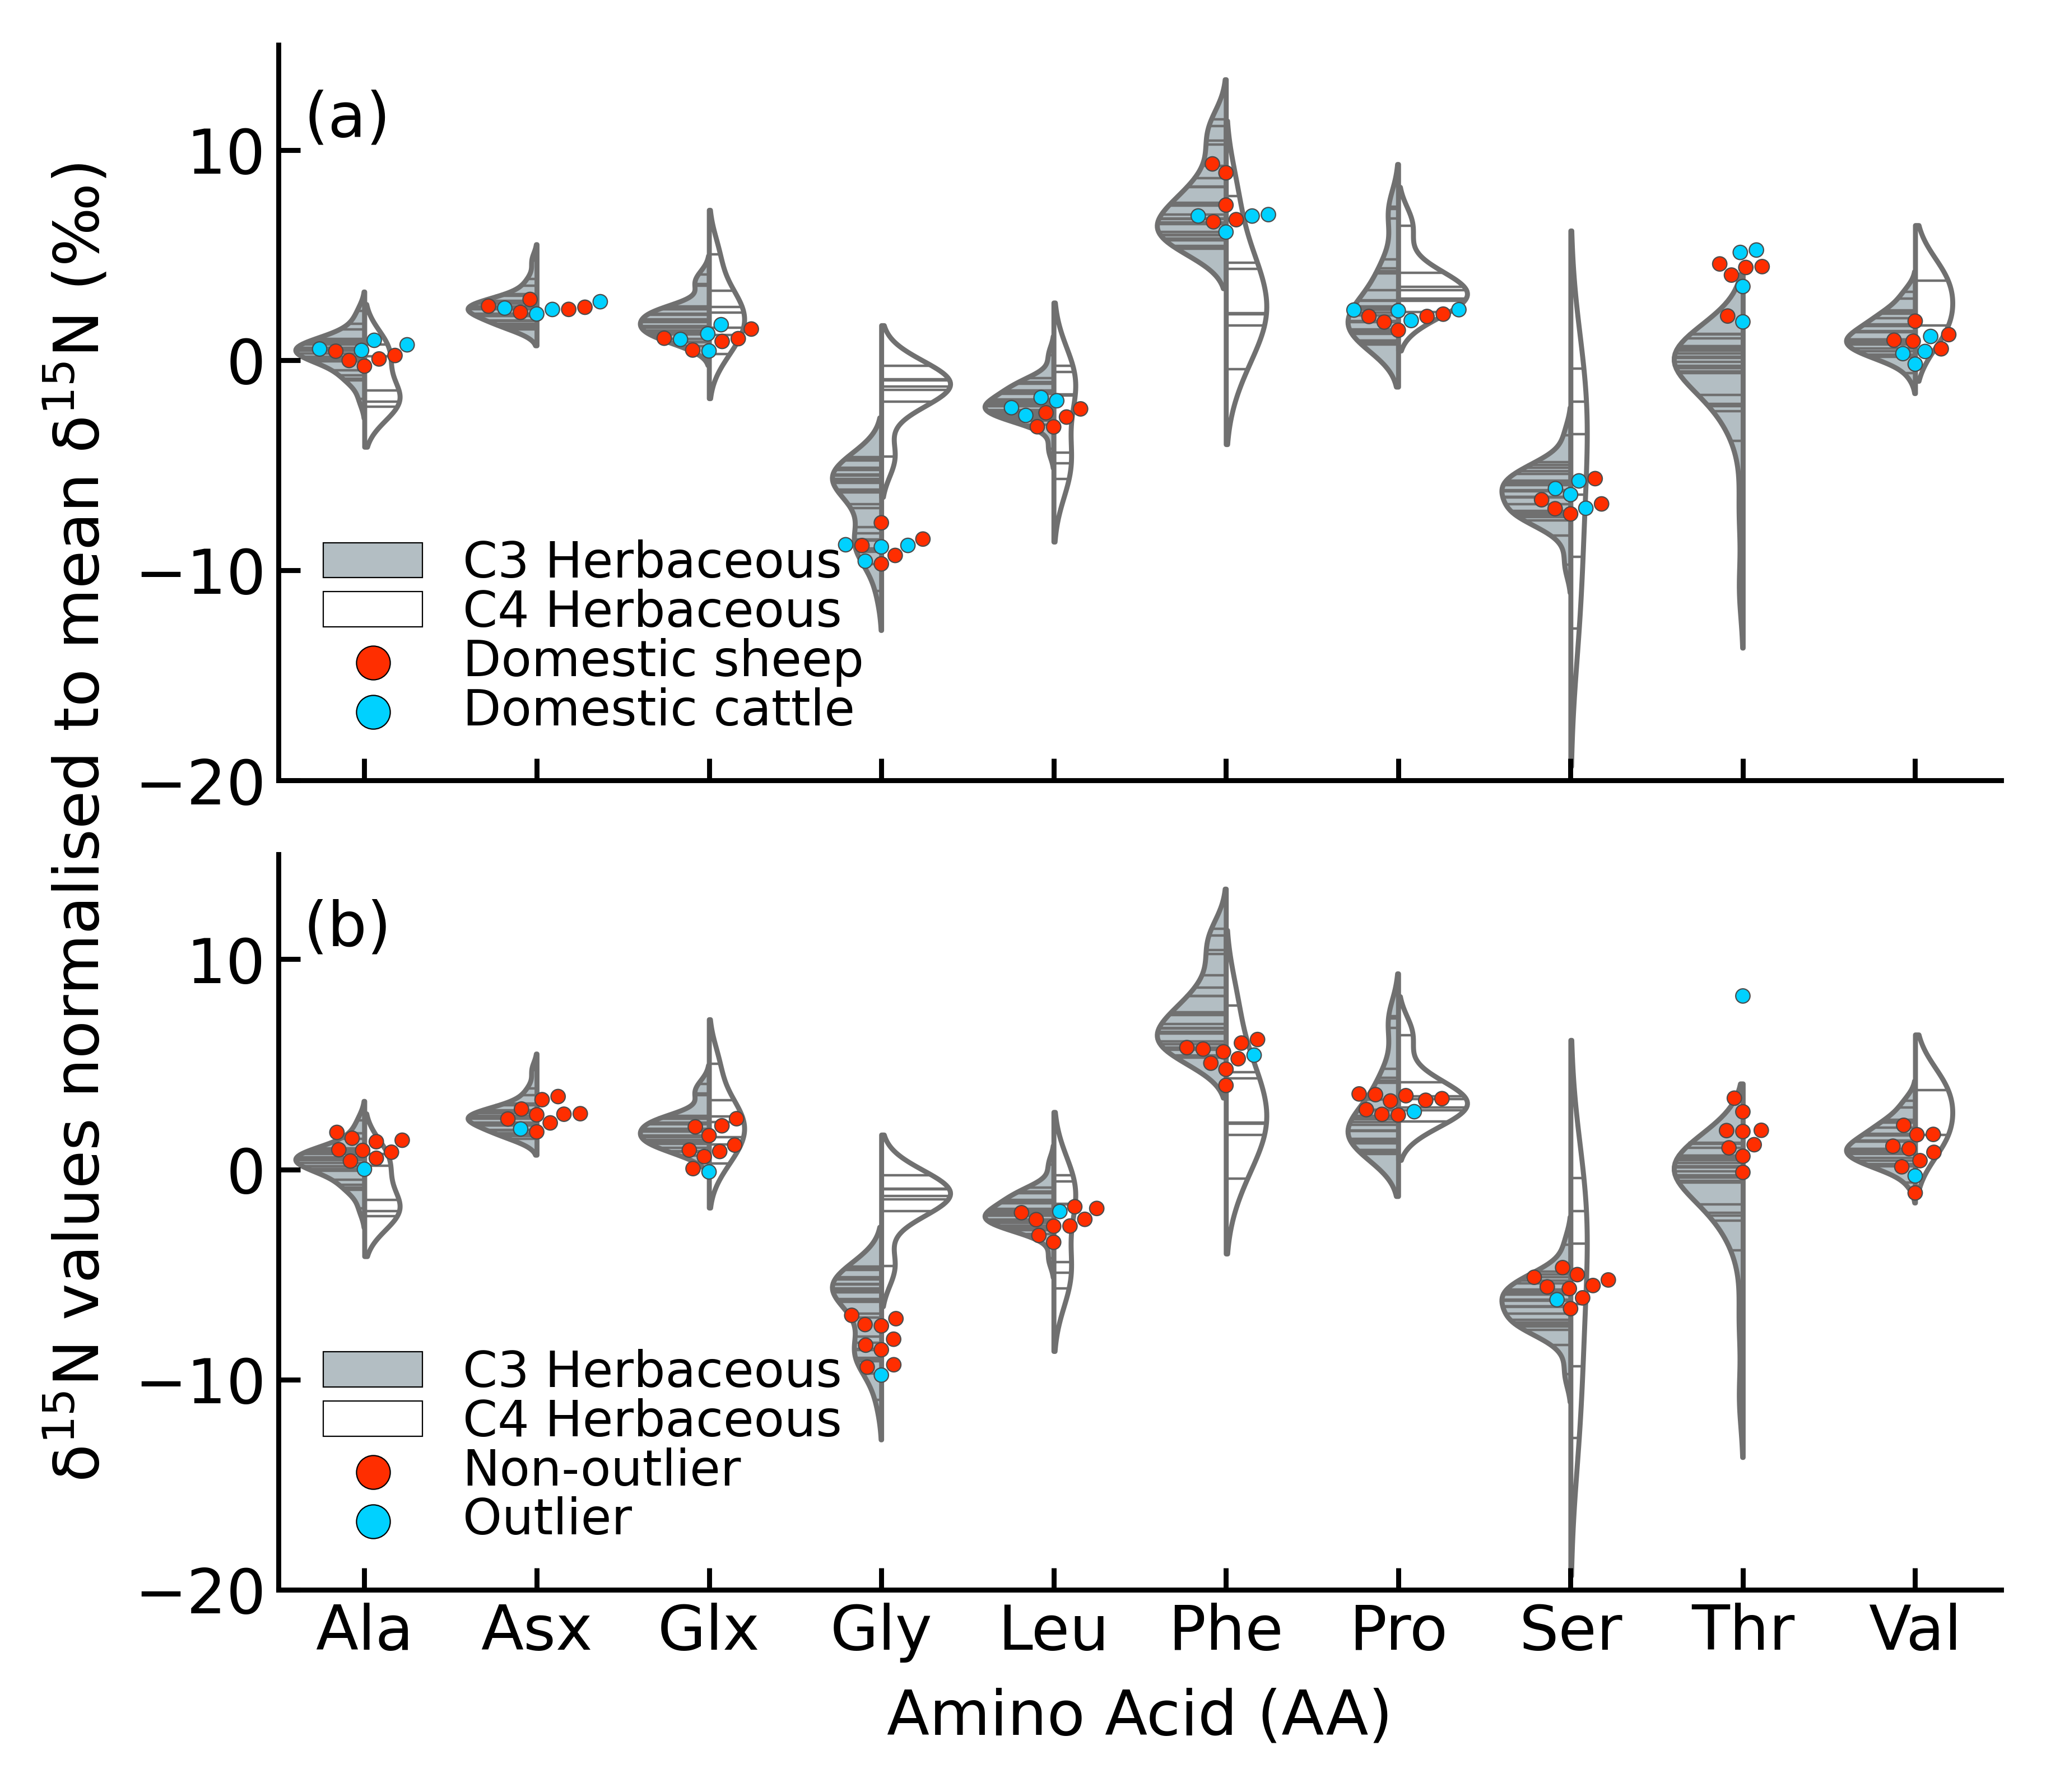

In [48]:
x_size = 84*0.039370*1.5
y_size = 174*0.039370*(2/3) 
fig, ax1 = plt.subplots(ncols=1,nrows=2, figsize=(x_size,y_size),dpi=800, sharey=True)
fontsize = 10
fig.subplots_adjust(hspace=0.1)
fig.text(0.02, 0.5, '$\mathregular{δ^{15}N}$' + ' values normalised to mean ' + '$\mathregular{δ^{15}N}$'+' (‰)',fontsize=fontsize, va='center', rotation='vertical')
#g.set_ylabel('$\mathregular{δ^{15}N}$ (‰)')
sns.violinplot(
    ax=ax1[0],x="AAs", y="value", data=df_herbaceous, hue="Assignment",split='True',inner="stick",
    palette=['#B0BFC6','#FFFFFF'],linewidth=0.8,bw='scott')

sns.swarmplot(
    x="AAs", y="value", ax=ax1[0],data=mak_violin,hue="Assignment",
    palette=['#FF2E00','#00D1FF'],linewidth=0.2,s=2.3)


#setting ticks
ax1[0].tick_params(bottom=True, left=True, direction='in',pad=2,labelsize=fontsize)
ax1[1].tick_params(bottom=True, left=True, direction='in',pad=2,labelsize=fontsize)

###SECOND PLOT####
sns.violinplot(
    ax=ax1[1],x="AAs", y="value", data=df_herbaceous, hue="Assignment",split='True',inner="stick",
    palette=['#B0BFC6','#FFFFFF'],linewidth=0.8,bw='scott')

sns.swarmplot(
    x="AAs", y="value", ax=ax1[1],data=vah_violin,hue="Assignment",
    palette=['#FF2E00','#00D1FF'],linewidth=0.2,s=2.3)

ax1[0].set_xlabel(None)
ax1[0].set_ylabel(None)
ax1[1].set_ylabel(None)
ax1[1].set_xlabel('Amino Acid (AA)',fontsize=fontsize)
ax1[0].set_title('(a)',x=0.04,y=0.825,fontsize=fontsize)
ax1[1].set_title('(b)',x=0.04,y=0.825,fontsize=fontsize)
ax1[0].set_ylim(-20,15)
ax1[1].set_ylim(-20,15)
#ax1[1].set_ylabel('$δ^{15}N$' + ' values normalised to mean ' + '$δ^{15}N$' + '(‰)',fontsize=fontsize)

#setting top and right border to be invisible
ax1[0].spines[['right', 'top']].set_visible(False)
ax1[1].spines[['right', 'top']].set_visible(False)

# Get the legend handles
handles0, labels0 = ax1[0].get_legend_handles_labels()
handles1, labels1 = ax1[1].get_legend_handles_labels()

# Iterate through the handles and call `set_edgecolor` on each
for ha in handles0:
    ha.set_edgecolor("black")
    ha.set_linewidth(0.2)
    
for ha in handles1:
    ha.set_edgecolor("black")
    ha.set_linewidth(0.2)

#setting legend 
ax1[0].legend(
    handles0,
    labels0,
    labelspacing=0.01,
    frameon=False,
    loc='lower left',
    fontsize=8,
    markerscale=0.7)

ax1[1].legend(
    handles1,
    labels1,
    labelspacing=0.01,
    frameon=False,
    loc='best',
    fontsize=8,
    markerscale=0.7)

#hiding redundant labels
labels_x = [item.get_text() for item in ax1[0].get_xticklabels()]
empty_string_labels_x = ['']*len(labels_x)
ax1[0].set_xticklabels(empty_string_labels_x)

#attempt to overlay C3 herbaceous only
#sns.violinplot(
    #x="AAs", y="value", data=df_herbaceous, hue="Assignment",split='True',inner="stick",
    #linewidth=0.8,legend=False,palette=['#FF2E00','#FFFFFF'],linewidth)

plt.savefig('figures\\herbivore_violin_C3herbaceous_revised',dpi=1000,format='png',facecolor='white',bbox_inches="tight")

In [49]:
#testing differences between C3 and C4 herbaceous plants using Welch's t test
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

t_test_herbaceous = round(pd.read_excel("data\\plants_aa_herbaceous_only.xlsx"),2)
t_test_herbaceous = t_test_herbaceous.loc[:,'Ala':'Val']

for AA in t_test_herbaceous.columns:
    result = stats.ttest_ind(t_test_herbaceous.loc[:26,AA],t_test_herbaceous.loc[26:,AA], equal_var=False,axis=0, nan_policy='omit')
    if result.pvalue < 0.05:
        print(AA, result)

    #Glx, Leu and Ser do not have equal variances

Gly Ttest_indResult(statistic=-7.431092767628246, pvalue=3.532577281189014e-06)
Phe Ttest_indResult(statistic=3.6811133554714104, pvalue=0.006110340117911635)


In [50]:
#testing for homogenous variances in LDA
test = X.merge(y,how='inner',right_index=True,left_index=True)

for AA in master_pred_list:
    Gly0 = test.loc[test['Part'] == 0,AA]
    Gly1 = test.loc[test['Part'] == 1,AA]
    Gly2 = test.loc[test['Part'] == 2,AA]
    Gly3 = test.loc[test['Part'] == 3,AA]
    Gly4 = test.loc[test['Part'] == 4,AA]
    result = stats.levene(Gly0,Gly1,Gly2,Gly3,Gly4,center='median')
    print(result)
    #print(Gly1)

LeveneResult(statistic=1.2660108011116542, pvalue=0.29192243077032676)
LeveneResult(statistic=0.3188394715550614, pvalue=0.8644281516232672)
LeveneResult(statistic=3.2944986896897714, pvalue=0.015798147410946168)
LeveneResult(statistic=2.0865892759099287, pvalue=0.09207932125395892)
LeveneResult(statistic=1.5362051491758204, pvalue=0.2015423232434778)


In [51]:
bulk_carbon_nitrogen = pd.read_excel("data\\bulk_isotopes_data.xlsx")

In [52]:
bulk_carbon_nitrogen_clean = bulk_carbon_nitrogen.dropna(axis=0).drop_duplicates(subset=['SampleID'])
bulk_carbon_nitrogen_clean.reset_index(inplace=True)
bulk_carbon_nitrogen_clean = bulk_carbon_nitrogen_clean.drop(labels="index",axis=1).round(1)

In [53]:
replace_dict = {"Vaihingen":"Vaihingen an der Enz", 
                "Catalhoyuk":"Çatalhöyük", 
                "Capra":"Goat",
                "Bos taurus":"Cattle",
                "Cervus elaphus":"Red deer",
                "Bos primigenius":"Aurochs",
               "Ovis":"Sheep"}

In [54]:
bulk_carbon_nitrogen_clean = bulk_carbon_nitrogen_clean.replace(replace_dict)
bulk_carbon_nitrogen_clean = bulk_carbon_nitrogen_clean.drop(
    bulk_carbon_nitrogen_clean[(bulk_carbon_nitrogen_clean["SampleID"] == "MAK262") |
                               (bulk_carbon_nitrogen_clean["SampleID"] == "MAK237")].index)

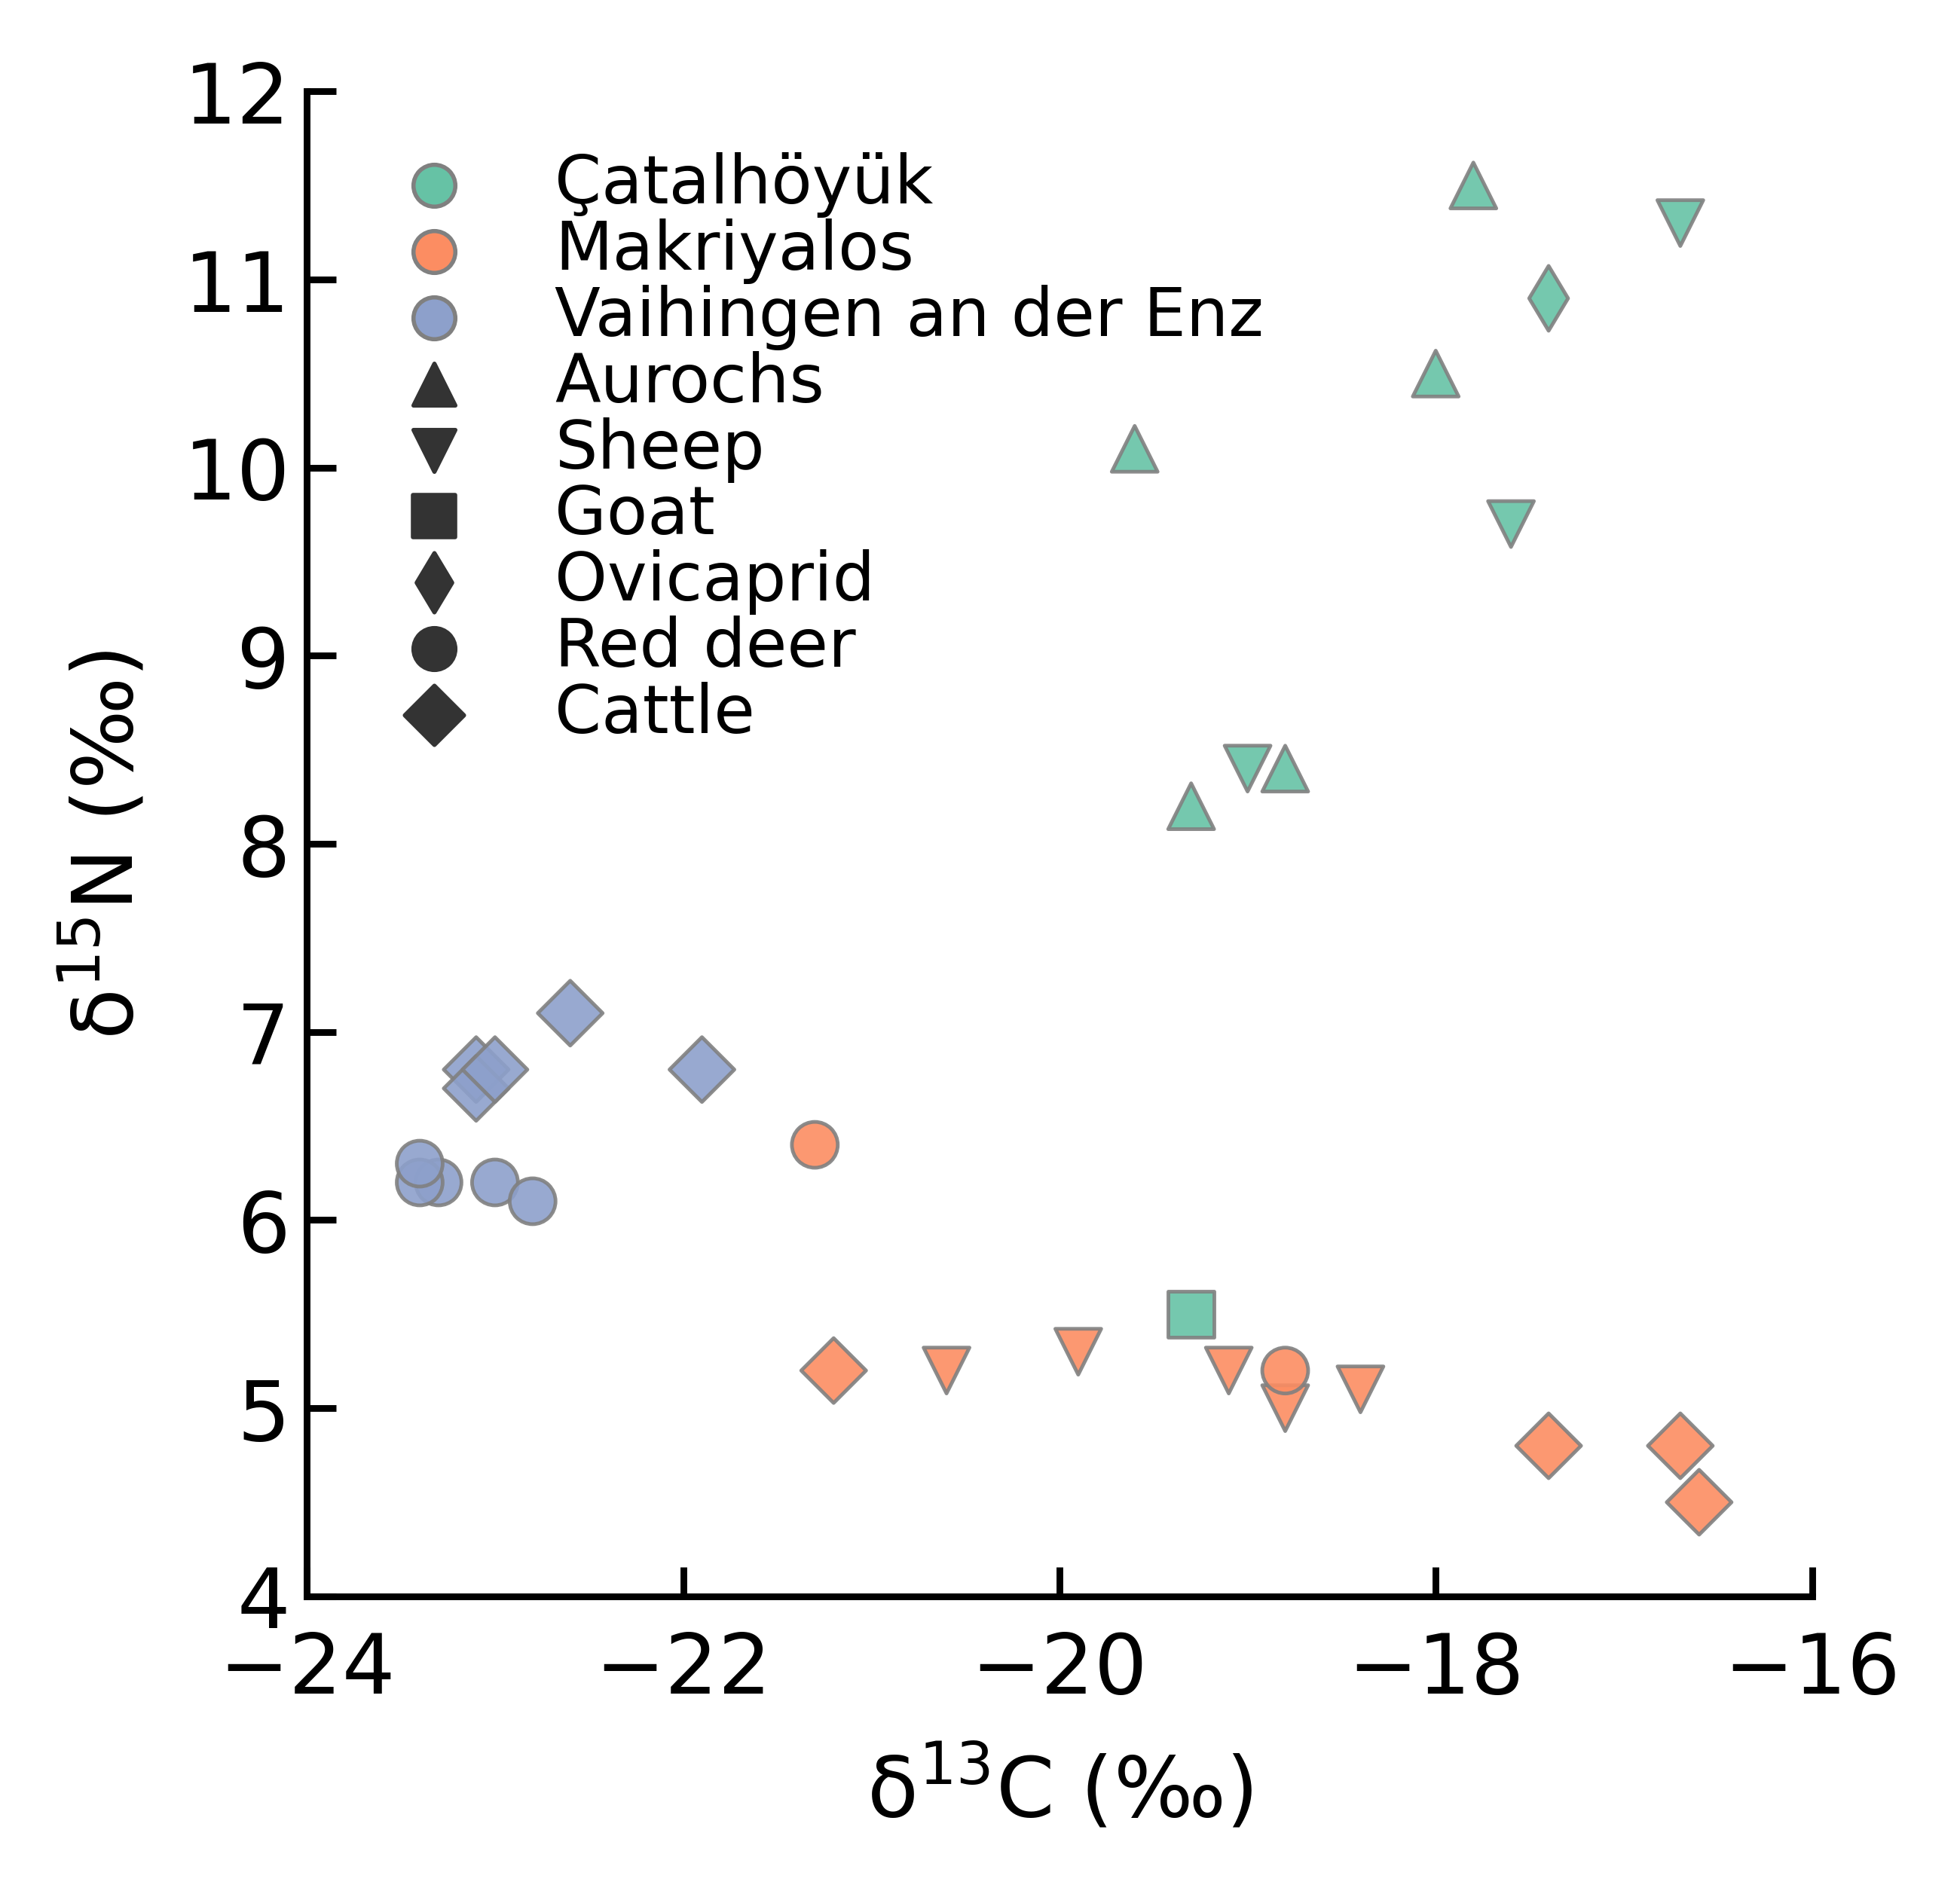

In [55]:
x_size = 84*0.039370
y_size = 84*0.039370

fig, ax = plt.subplots(nrows=1,ncols=1, sharex=False,figsize=(x_size,y_size),dpi=800)

plt.tick_params(axis="y",direction="in", pad=2)
plt.tick_params(axis="x",direction="in", pad=4)

g = sns.scatterplot(x="Bulk d13C", y="Bulk d15N",ax=ax, data = bulk_carbon_nitrogen_clean,
                hue="Site",style="Species", markers=["^","v","s","d","o","D"], palette="Set2"
               ,s=30,edgecolor='grey',linewidths=0.75,alpha=0.9)
g.patch.set_facecolor('white')
g.set_xlabel('$\mathregular{δ^{13}C}$ (‰)')
g.set_ylabel('$\mathregular{δ^{15}N}$ (‰)')

#setting the axis
ax.axis("scaled")
ax.set_xlim(-24,-16)
ax.set_ylim(4,12)

#setting top and right border to be invisible
g.spines[['right', 'top']].set_visible(False)

handles, labels = g.get_legend_handles_labels()
for handle in handles:
    handle.set_sizes([25])
    if (handle.get_facecolor()[0] != [0.2,0.2, 0.2, 1. ]).any():
        handle.set_edgecolor("grey")
    handle.set_linewidth(0.5)

plt.legend(fontsize='8', labelspacing=0.01,frameon=False,loc="best",
           handles=handles[1:4] + handles[5:], labels=labels[1:4] + labels[5:])

plt.savefig('figures\\bulk_isotope_values',format ='png',dpi=1000,facecolor='white',bbox_inches="tight")